In [2]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import seaborn as sns
import plotly.express as px
import folium
from kneed import KneeLocator
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.linear_model import LinearRegression
from pandas.plotting import parallel_coordinates
from scipy import stats
import numpy as np

In [3]:
df = pd.read_csv('df1.csv')

In [4]:
df.head()

Domain Code                 Domain  Area Code (FAO) Code     Area  \
0         FBS  Food Balances (2014-)               11  AUT  Austria   
1         FBS  Food Balances (2014-)               11  AUT  Austria   
2         FBS  Food Balances (2014-)               11  AUT  Austria   
3         FBS  Food Balances (2014-)               11  AUT  Austria   
4         FBS  Food Balances (2014-)               11  AUT  Austria   

   Element Code                              Element  Item Code  Year Unit  \
0           645  Food supply quantity (kg/capita/yr)       2511  2014   kg   
1           645  Food supply quantity (kg/capita/yr)       2511  2015   kg   
2           645  Food supply quantity (kg/capita/yr)       2511  2016   kg   
3           645  Food supply quantity (kg/capita/yr)       2511  2017   kg   
4           645  Food supply quantity (kg/capita/yr)       2511  2018   kg   

   ...  Soyabean Oil  Soyabeans  Spices, Other  Sugar (Raw Equivalent)  \
0  ...          0.87       2.13           0.49                   39.87   
1  ...          1.17       2.13           0.53                   41.98   
2  ...          0.99       2.13           0.54                   43.56   
3  ...          1.17       2.14           0.55                   42.36   
4  ...          1.18       2.14           0.55                   41.65   

   Sunflowerseed Oil  Sweeteners, Other  Tea (including mate)  \
0               2.48               3.80                  0.32   
1               2.48               3.80                  0.32   
2               2.49               3.81                  0.32   
3               2.50               3.84                  0.33   
4               2.50               3.64                  0.33   

   Tomatoes and products  Vegetables, Other   Wine  
0                  13.85              70.40  31.43  
1                  13.56              62.48  31.07  
2                  13.52              67.93  25.69  
3                  13.16              69.12  31.70  
4                  13.62              65.40  26.29  

[5 rows x 78 columns]

In [5]:
#Analyzing the main dataset with all fiid consumption data
df.describe()

Area Code (FAO)  Element Code  Item Code         Year  \
count       135.000000         135.0      135.0   135.000000   
mean        127.962963         645.0     2511.0  2016.000000   
std          66.453037           0.0        0.0     1.419481   
min          11.000000         645.0     2511.0  2014.000000   
25%          68.000000         645.0     2511.0  2015.000000   
50%         119.000000         645.0     2511.0  2016.000000   
75%         183.000000         645.0     2511.0  2017.000000   
max         256.000000         645.0     2511.0  2018.000000   

       Wheat and products  Rice and products  Barley and poducts  \
count          135.000000         135.000000          135.000000   
mean           100.824370           5.565481            3.093259   
std             21.008285           3.845804            4.843205   
min             57.640000           1.150000            0.000000   
25%             86.575000           3.315000            0.315000   
50%            103.480000           4.620000            1.040000   
75%            116.000000           6.125000            3.210000   
max            148.110000          22.870000           23.350000   

       Apples and products  Aquatic Animals, Others  Aquatic Plants  ...  \
count           135.000000               135.000000           135.0  ...   
mean             13.798667                 0.024222             0.0  ...   
std               8.419438                 0.032838             0.0  ...   
min               0.870000                 0.000000             0.0  ...   
25%               8.540000                 0.010000             0.0  ...   
50%              10.880000                 0.010000             0.0  ...   
75%              18.970000                 0.020000             0.0  ...   
max              33.950000                 0.170000             0.0  ...   

       Soyabean Oil   Soyabeans  Spices, Other  Sugar (Raw Equivalent)  \
count    135.000000  135.000000     135.000000              135.000000   
mean       1.969926    0.261704       0.464815               31.031259   
std        1.559482    0.446630       0.400108                9.283418   
min        0.000000    0.000000       0.040000               11.170000   
25%        0.635000    0.050000       0.200000               24.160000   
50%        1.500000    0.100000       0.330000               31.170000   
75%        3.190000    0.200000       0.580000               36.635000   
max        5.090000    2.140000       2.600000               50.920000   

       Sunflowerseed Oil  Sweeteners, Other  Tea (including mate)  \
count         135.000000         135.000000            135.000000   
mean            3.844370          22.982815              0.420296   
std             2.812192          29.913579              0.463670   
min             0.000000           0.310000              0.060000   
25%             1.835000           3.720000              0.135000   
50%             3.320000          13.000000              0.320000   
75%             4.650000          29.320000              0.400000   
max            12.180000         151.280000              2.590000   

       Tomatoes and products  Vegetables, Other        Wine  
count             135.000000         135.000000  135.000000  
mean               22.645778          79.539037   20.306370  
std                15.800655          34.519722   11.502568  
min                 7.750000          42.050000    2.890000  
25%                12.985000          62.380000   12.620000  
50%                16.260000          71.230000   19.140000  
75%                25.255000          84.145000   25.585000  
max                81.590000         278.750000   55.070000  

[8 rows x 72 columns]

In [6]:
df.info

<bound method DataFrame.info of     Domain Code                 Domain  Area Code (FAO) Code     Area  \
0           FBS  Food Balances (2014-)               11  AUT  Austria   
1           FBS  Food Balances (2014-)               11  AUT  Austria   
2           FBS  Food Balances (2014-)               11  AUT  Austria   
3           FBS  Food Balances (2014-)               11  AUT  Austria   
4           FBS  Food Balances (2014-)               11  AUT  Austria   
..          ...                    ...              ...  ...      ...   
130         FBS  Food Balances (2014-)              210  SWE   Sweden   
131         FBS  Food Balances (2014-)              210  SWE   Sweden   
132         FBS  Food Balances (2014-)              210  SWE   Sweden   
133         FBS  Food Balances (2014-)              210  SWE   Sweden   
134         FBS  Food Balances (2014-)              210  SWE   Sweden   

     Element Code                              Element  Item Code  Year Unit  \
0          

In [7]:
#Checking null values
df.isna().sum()

Domain Code              0
Domain                   0
Area Code (FAO)          0
Code                     0
Area                     0
                        ..
Sweeteners, Other        0
Tea (including mate)     0
Tomatoes and products    0
Vegetables, Other        0
Wine                     0
Length: 78, dtype: int64

In [8]:
df1 = df.dropna(axis=1)

In [9]:
print(len(df1.columns))

78


In [10]:
print(len(df1))

135


In [11]:
#Choosing year 2014
df2014 = df1.loc[df1['Year'] == 2014 ]

In [12]:
#Dropping unnecessary columns
df2014=df2014.drop(columns=['Domain Code', 'Domain','Area Code (FAO)','Element Code','Element','Item Code','Year','Unit'])

In [13]:
#Selecting only countries 
df_countries=df2014.iloc[:,1]

In [14]:
df_countries=df_countries.reset_index(drop=True)

In [15]:
#Selecting numerical variables for standardization
df_c=df2014.iloc[:,2:]

In [16]:
df_c.head()

Wheat and products  Rice and products  Barley and poducts  \
0                87.32               5.26                0.53   
5               114.62              10.50                2.33   
10              117.39               4.34                0.91   
15              105.45               2.54                0.75   
20              115.23               4.95                8.72   

    Apples and products  Aquatic Animals, Others  Aquatic Plants  Bananas  \
0                 33.95                     0.02               0    11.16   
5                  9.07                     0.05               0     3.24   
10                 6.71                     0.01               0     4.11   
15                19.61                     0.01               0    11.40   
20                 9.45                     0.01               0     7.76   

      Beer  Beverages, Alcoholic  Beverages, Fermented  ...  Soyabean Oil  \
0   104.13                  4.53                  0.00  ...          0.87   
5    76.31                  1.31                  0.57  ...          4.30   
10   74.82                  8.36                  0.02  ...          1.55   
15   80.98                  3.18                  0.23  ...          1.09   
20   37.67                  4.60                  1.01  ...          3.19   

    Soyabeans  Spices, Other  Sugar (Raw Equivalent)  Sunflowerseed Oil  \
0        2.13           0.49                   39.87               2.48   
5        0.19           0.56                   47.74               1.74   
10       0.03           0.86                   26.10               4.97   
15       0.01           0.09                   38.21               3.99   
20       0.07           0.30                   21.65               6.44   

    Sweeteners, Other  Tea (including mate)  Tomatoes and products  \
0                3.80                  0.32                  13.85   
5                4.94                  0.27                  18.10   
10               7.96                  0.10                  21.39   
15              18.00                  0.06                   9.33   
20              38.10                  0.33                  20.55   

    Vegetables, Other   Wine  
0               70.40  31.43  
5               93.53  25.16  
10              42.05   6.54  
15              43.45  13.38  
20              72.69  15.49  

[5 rows x 68 columns]

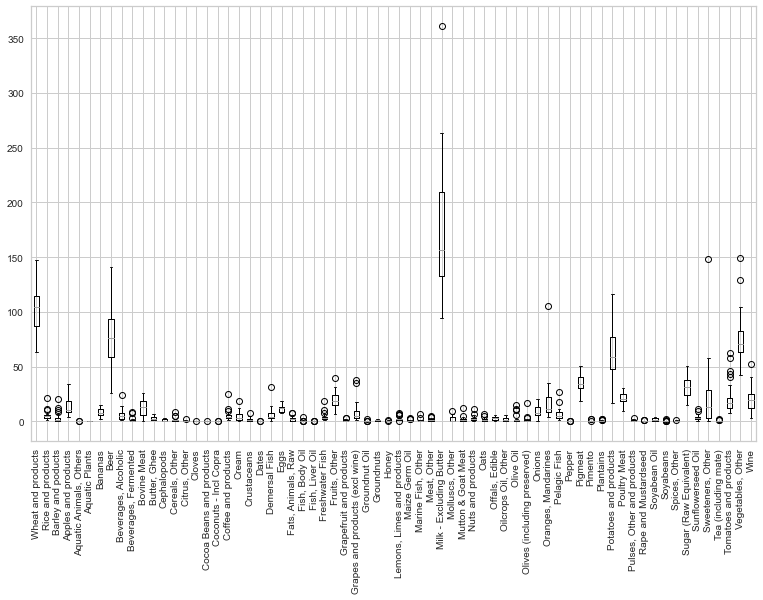

In [17]:
#Boxplot of all variavles
plt.figure(figsize=(13,8))
df_c.boxplot()
plt.xticks(rotation=90);

In [18]:
len(df_c.columns)

68

In [19]:
#Color lists for different k:s
colors=["#6b73f7","#85a796","#ddb751"]
colors2=["#6b73f7","#85a796"]
colors4=["#6b73f7","#85a796","#ddb751","#B994aa"]

In [20]:
pd.options.display.max_columns = df_c.shape[1]
df_c.describe(include = 'all')

Wheat and products  Rice and products  Barley and poducts  \
count           27.000000          27.000000           27.000000   
mean           101.707778           5.408519            3.104074   
std             20.387292           3.906207            4.838915   
min             63.530000           1.150000            0.010000   
25%             87.380000           3.290000            0.330000   
50%            104.050000           4.630000            0.910000   
75%            114.925000           5.700000            2.820000   
max            147.400000          21.220000           20.910000   

       Apples and products  Aquatic Animals, Others  Aquatic Plants  \
count            27.000000                27.000000            27.0   
mean             14.459630                 0.025926             0.0   
std               8.971945                 0.038954             0.0   
min               3.900000                 0.000000             0.0   
25%               8.680000                 0.000000             0.0   
50%              10.750000                 0.010000             0.0   
75%              19.080000                 0.030000             0.0   
max              33.950000                 0.170000             0.0   

         Bananas        Beer  Beverages, Alcoholic  Beverages, Fermented  \
count  27.000000   27.000000             27.000000             27.000000   
mean    8.274074   75.655185              5.735185              1.133333   
std     3.547515   29.650273              5.057120              2.077654   
min     2.370000   26.060000              0.830000              0.000000   
25%     5.445000   58.470000              2.290000              0.125000   
50%     8.070000   75.740000              4.530000              0.410000   
75%    11.100000   93.220000              7.455000              1.005000   
max    14.660000  141.230000             24.250000              8.260000   

       Bovine Meat  Butter, Ghee  Cephalopods  Cereals, Other  Citrus, Other  \
count    27.000000     27.000000    27.000000       27.000000      27.000000   
mean     13.067407      2.832593     0.812593        1.362963       0.396667   
std       7.448825      1.838814     1.031278        1.938463       0.472554   
min       0.270000      0.850000     0.010000        0.040000       0.020000   
25%       6.260000      1.040000     0.070000        0.265000       0.110000   
50%      13.530000      2.520000     0.220000        0.890000       0.250000   
75%      18.635000      3.615000     1.760000        1.330000       0.570000   
max      25.940000      6.710000     3.050000        8.820000       2.360000   

          Cloves  Cocoa Beans and products  Coconuts - Incl Copra  \
count  27.000000                 27.000000              27.000000   
mean    0.003704                  0.001481               0.164074   
std     0.008389                  0.007698               0.123577   
min     0.000000                  0.000000               0.020000   
25%     0.000000                  0.000000               0.085000   
50%     0.000000                  0.000000               0.150000   
75%     0.005000                  0.000000               0.190000   
max     0.040000                  0.040000               0.550000   

       Coffee and products      Cream  Crustaceans      Dates  Demersal Fish  \
count            27.000000  27.000000    27.000000  27.000000      27.000000   
mean              5.351852   4.717778     1.923333   0.135556       6.130370   
std               4.736761   4.580651     1.886719   0.126258       6.070317   
min               1.280000   0.000000     0.050000   0.030000       0.690000   
25%               3.010000   1.530000     0.585000   0.055000       2.860000   
50%               4.240000   3.350000     1.330000   0.100000       4.310000   
75%               5.625000   6.870000     2.625000   0.150000       7.430000   
max              25.460000  18.410000     8.130000   0.630000      31.360000   

     

In [21]:
#Dropping column with 0 values
df_c.drop(columns=['Aquatic Plants'],inplace=True)

In [22]:
len(df_c.columns)

67

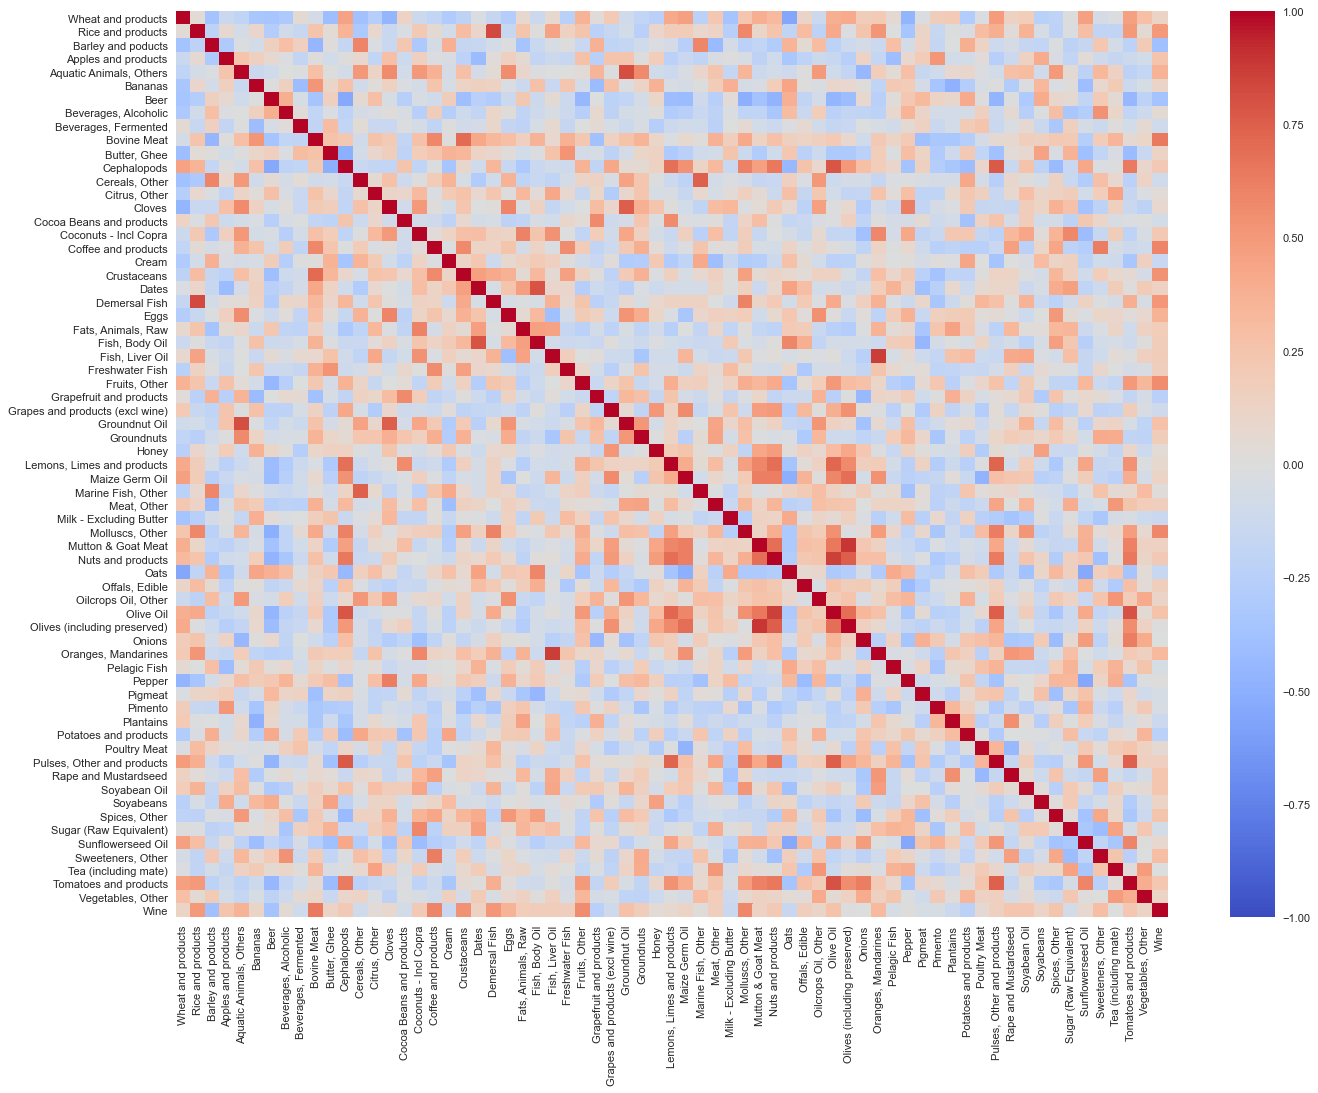

In [23]:
#Correlation matrix of all variables
corrMatrix = df_c.corr()
plt.style.use('seaborn-white')
plt.figure(figsize=(20, 15), dpi=80)
sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=False,cmap="coolwarm")
plt.show()

In [24]:
#Scaling df
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_c)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df_c.columns

In [25]:
scaled_df.head(3)

Wheat and products  Rice and products  Barley and poducts  \
0           -0.719166          -0.038745           -0.542086   
1            0.645411           1.328263           -0.163016   
2            0.783869          -0.278755           -0.462060   

   Apples and products  Aquatic Animals, Others   Bananas      Beer  \
0             2.213751                -0.155026  0.829003  0.978650   
1            -0.612164                 0.629793 -1.446074  0.022505   
2            -0.880217                -0.416632 -1.196160 -0.028704   

   Beverages, Alcoholic  Beverages, Fermented  Bovine Meat  Butter, Ghee  \
0             -0.242854             -0.555878     0.118008      1.422828   
1             -0.891709             -0.276304    -0.070785      1.057063   
2              0.528921             -0.546069    -1.247323     -1.098730   

   Cephalopods  Cereals, Other  Citrus, Other    Cloves  \
0    -0.585565        0.229750      -0.618188  0.764866   
1    -0.634973       -0.695481       1.085423 -0.449921   
2    -0.684380       -0.695481      -0.553494 -0.449921   

   Cocoa Beans and products  Coconuts - Incl Copra  Coffee and products  \
0                 -0.196116              -0.033596             0.539594   
1                 -0.196116               3.182455             0.105018   
2                 -0.196116              -0.610836            -0.387644   

      Cream  Crustaceans     Dates  Demersal Fish      Eggs  \
0  0.665674    -0.320470 -0.286975      -0.520472  0.591918   
1  1.279687     0.322270  1.165837       0.184599 -1.266681   
2 -1.020635    -0.790372  0.035872      -0.884759 -1.378341   

   Fats, Animals, Raw  Fish, Body Oil  Fish, Liver Oil  Freshwater Fish  \
0            0.184616       -0.212773        -0.426133         0.049529   
1            2.562389       -0.212773         4.418329         0.860943   
2           -0.301018       -0.212773        -0.426133        -0.572461   

   Fruits, Other  Grapefruit and products  Grapes and products (excl wine)  \
0       0.949532                -1.066356                        -0.421796   
1      -0.599653                 0.920633                        -0.190165   
2      -0.549103                 0.749568                        -0.571804   

   Groundnut Oil  Groundnuts     Honey  Lemons, Limes and products  \
0      -0.279695    0.136085  1.784519                    0.276611   
1      -0.401892   -1.303325 -0.150251                   -0.258932   
2      -0.181938   -1.151808 -2.085021                   -0.643125   

   Maize Germ Oil  Marine Fish, Other  Meat, Other  Milk - Excluding Butter  \
0       -0.772383           -0.031467    -0.226068                 0.073549   
1        2.130315           -0.301435    -0.226068                -1.268533   
2        0.495786           -0.531702    -0.503514                -0.664417   

   Molluscs, Other  Mutton & Goat Meat  Nuts and products      Oats  \
0        -0.629794           -0.291885           1.004095  0.091641   
1         0.690541           -0.201051           0.238285 -0.901562   
2        -0.810213            0.041171          -0.652192 -0.884137   

   Offals, Edible  Oilcrops Oil, Other  Olive Oil  \
0       -0.630996            -0.058700  -0.350499   
1        0.055096             0.045228  -0.287610   
2        0.856606            -1.091476  -0.528229   

   Olives (including preserved)    Onions  Oranges, Mandarines  Pelagic Fish  \
0                     -0.327428  1.601305            -0.505483     -0.496917   
1                     -0.346605 -1.604959             4.573814     -0.289548   
2                      0.260664 -0.923865            -0.595186     -0.717482   

     Pepper   Pigmeat   Pimento  Plantains  Potatoes and products  \
0 -0.471951  1.395382 -0.100050  -0.736042              -0.178219   
1  0.412957 -0.648282 -0.338946   1.900525               1.445307   
2 -1.887804 -1.117567  0.157222  -0.010986              -1.719448   

   Poultry Meat  Pulses, Other and products  Rape and Mus

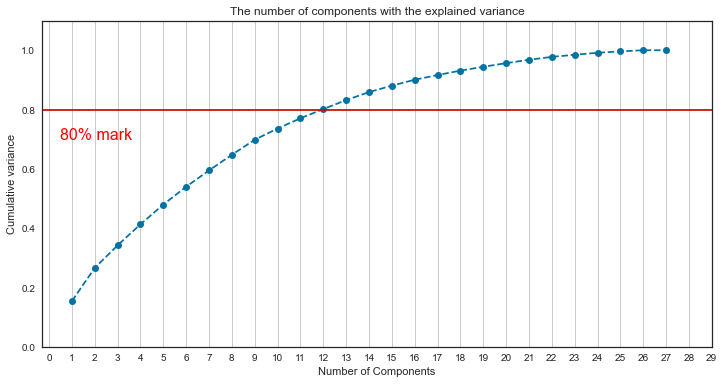

In [26]:
#PCA analysis
pca = PCA().fit(scaled_df)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 28, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 30, step=1))
plt.ylabel('Cumulative variance')
plt.title('The number of components with the explained variance')

plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.7, '80% mark', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [27]:
#Explained variances
print(np.cumsum(pca.explained_variance_ratio_))

[0.15428063 0.26579731 0.34210545 0.41294175 0.47966845 0.53974828
 0.59469262 0.64739287 0.69827382 0.73597687 0.77059653 0.80159946
 0.83189212 0.85868439 0.88073806 0.90042053 0.91642942 0.93114787
 0.94427395 0.95631896 0.96799199 0.9775679  0.98472576 0.99149588
 0.99616571 1.         1.        ]


In [28]:
#Choosing 12 variables
pca=PCA(n_components=12)
pca.fit(scaled_df)
scores_pca=pca.transform(scaled_df)

In [29]:
idx_list=list(range(0,27))
col_list= ['1','2','3','4','5','6','7','8','9','10','11','12']

In [30]:
#Transforming PCA into df
pca_df=pd.DataFrame(scores_pca,columns=col_list,index=idx_list)

In [31]:
sse = []
list_k = list(range(1, 7))

In [32]:
#Analysis for right amount of k:s
for k in list_k:
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(pca_df)
    sse.append(km.inertia_)

C:\Users\suvip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


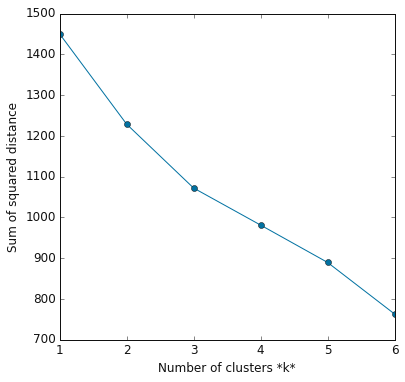

In [33]:
#Visualization of elbow method
plt.figure(figsize=(6, 6))
plt.style.use('classic')
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [34]:
silhouette_score(pca_df, km.labels_, metric='euclidean')

0.12235174956239209

In [35]:
#Knee locator; no elbow point found
kl = KneeLocator(
range(1, 7), sse, curve="convex", direction="decreasing")

C:\Users\suvip\anaconda3\lib\site-packages\kneed\knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


In [36]:
print(kl.elbow)

None


<h3>K-Means using k=2 clusters</h3>

In [37]:
pca_df=pd.DataFrame(pca_df,columns=col_list,index=idx_list)

In [38]:
#K-means for 2 clusters
km = KMeans(init='k-means++', n_clusters=2, n_init=10,random_state=42)
km.fit(pca_df)
clusterLabels = km.labels_

In [39]:
#Transforming cluster labels
newlist=[]
for item in clusterLabels:
    if item == 0:
        item = 1
    elif item == 1:
        item = 2
    elif item == 2:
        item = 3
    elif item == 3:
        item = 4
    newlist.append(item)
    
clusterLabels=newlist

In [40]:
silhouette_avg = silhouette_score(pca_df, clusterLabels)
print(silhouette_avg)

0.16422527475814347


In [41]:
visualizer = SilhouetteVisualizer(km, colors=colors2)

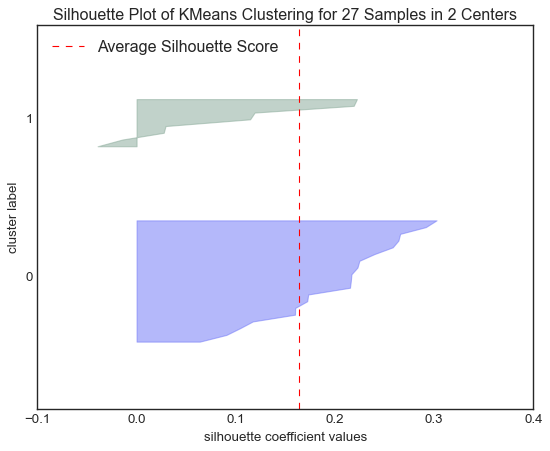

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 27 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
#Silhouette plot
plt.style.use('seaborn-white')
visualizer.fit(pca_df)
visualizer.show()

In [43]:
pca_df['Cluster']=clusterLabels
pca_df['Country']=df_countries

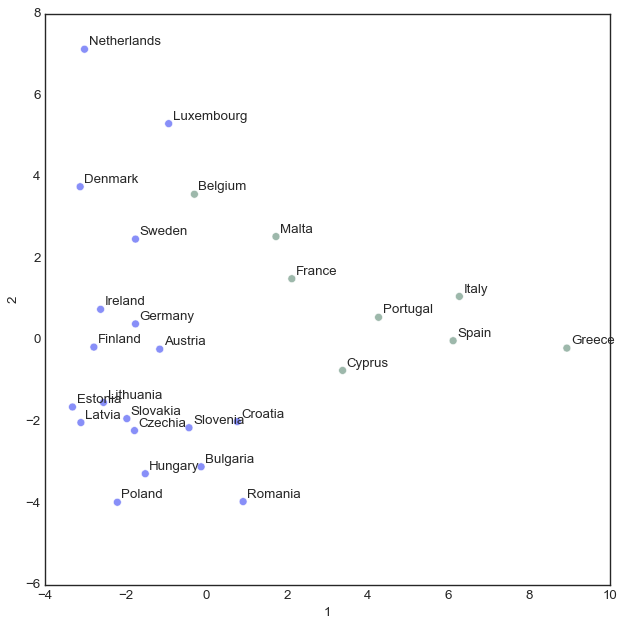

In [44]:
#Visualizing 2 clusters over the 2 first princlipal components
plt.figure(figsize=(8,8))
plt.style.use('seaborn-white')
sns.scatterplot(data=pca_df, x='1', y='2', hue='Cluster',legend=False, sizes=(20, 2000),palette=colors2,alpha=0.8,s=50)
for i in range(pca_df.shape[0]):
    plt.text(x=pca_df['1'][i]+0.1,y=pca_df['2'][i]+0.1,s=pca_df.Country[i])
    
plt.tight_layout()

In [45]:
#Number of ccountries per cluster
pca_df.groupby('Cluster')['Country'].count()

Cluster
1    19
2     8
Name: Country, dtype: int64

<h3>K-Means using k=4 clusters</h3>

In [46]:
pca_df=pd.DataFrame(scores_pca,columns=col_list,index=idx_list)

In [47]:
#K-means with 4 k:s
km = KMeans(init='k-means++', n_clusters=4, n_init=10,random_state=42)
km.fit(pca_df)
clusterLabels = km.labels_

In [48]:
newlist=[]
for item in clusterLabels:
    if item == 0:
        item = 1
    elif item == 1:
        item = 2
    elif item == 2:
        item = 3
    elif item == 3:
        item = 4
    newlist.append(item)
    
clusterLabels=newlist

In [49]:
#Silhouette score
silhouette_avg = silhouette_score(scores_pca, clusterLabels)
print(silhouette_avg)

0.14479629903871635


In [50]:
visualizer = SilhouetteVisualizer(km, colors=colors4)

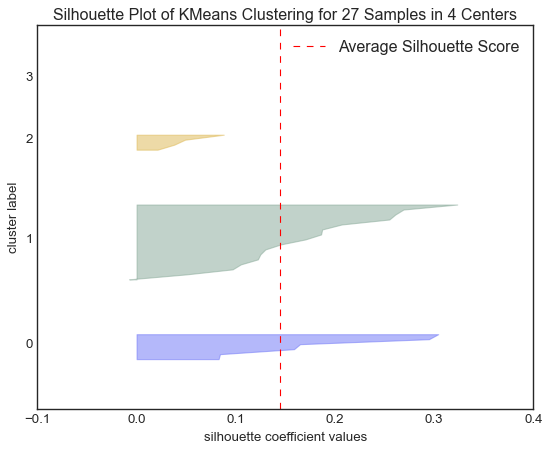

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 27 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
#Silhouette plot
visualizer.fit(pca_df)
plt.style.use('seaborn-white')
visualizer.show()

In [52]:
pca_df['Cluster']=clusterLabels
pca_df['Country']=df_countries

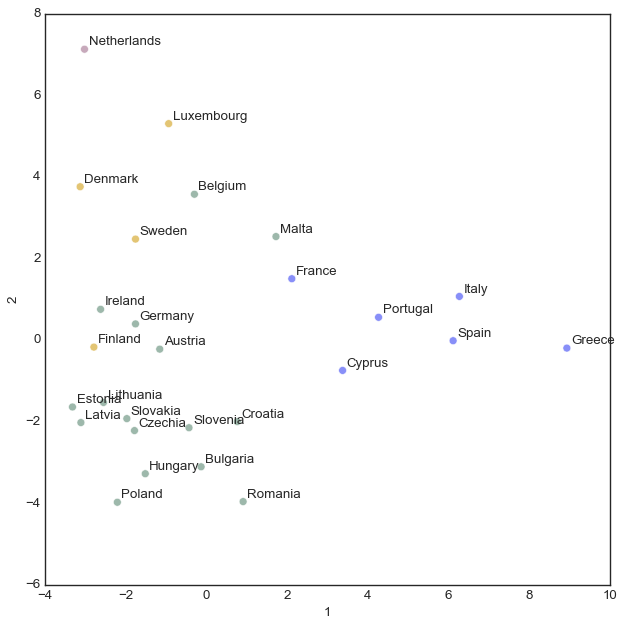

In [53]:
#Visualizing 4 k:s over the 2 first pc:s
plt.figure(figsize=(8,8))
plt.style.use('seaborn-white')
sns.scatterplot(data=pca_df, x='1', y='2', hue='Cluster',legend=False, sizes=(20, 2000),palette=colors4,alpha=0.8,s=50)
for i in range(pca_df.shape[0]):
    plt.text(x=pca_df['1'][i]+0.1,y=pca_df['2'][i]+0.1,s=pca_df.Country[i])
    
plt.tight_layout()

In [54]:
#Number of countries in clusters
pca_df.groupby('Cluster')['Country'].count()

Cluster
1     6
2    16
3     4
4     1
Name: Country, dtype: int64

<h3>K-means using k=3 clusters</h3>

In [55]:
pca_df=pd.DataFrame(scores_pca,columns=col_list,index=idx_list)

In [56]:
#K-means with 3 clusters
km = KMeans(init='k-means++', n_clusters=3, n_init=10,random_state=42)
km.fit(pca_df)
clusterLabels = km.labels_

In [57]:
newlist=[]
for item in clusterLabels:
    if item == 0:
        item = 1
    elif item == 1:
        item = 2
    elif item == 2:
        item = 3
    elif item == 3:
        item = 4
    newlist.append(item)
    
clusterLabels=newlist

In [58]:
#Silhouette score
silhouette_avg = silhouette_score(pca_df, clusterLabels)
print(silhouette_avg)

0.12373208188875338


In [59]:
visualizer = SilhouetteVisualizer(km, colors=colors)

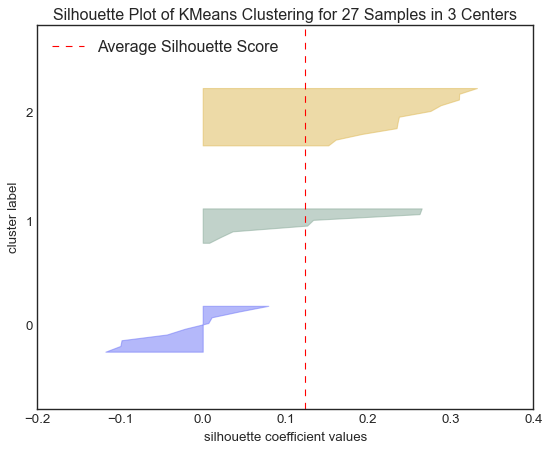

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 27 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
#Silhouette plot
visualizer.fit(pca_df)
plt.style.use('seaborn-white')
visualizer.show()

In [61]:
pca_df['Cluster']=clusterLabels
pca_df['Country']=df_countries

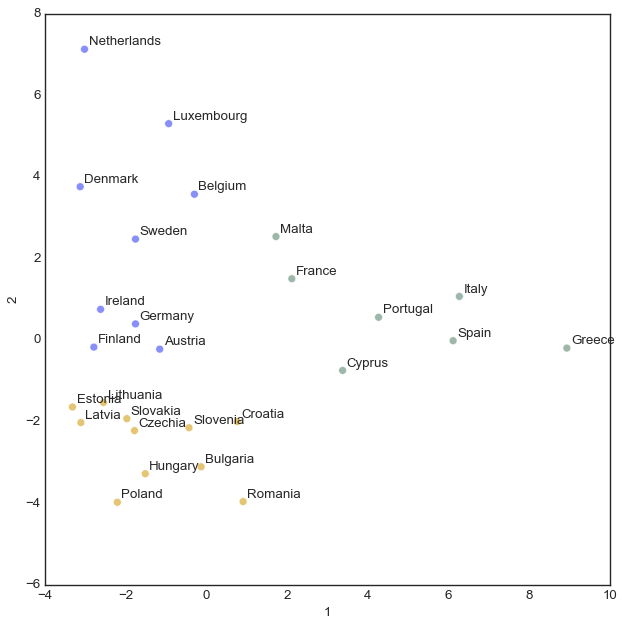

In [62]:
#VIsualizing countries over 2 first pc:s
from adjustText import adjust_text
plt.figure(figsize=(8,8))
plt.style.use('seaborn-white')
sns.scatterplot(data=pca_df, x='1', y='2', hue='Cluster',legend=False, sizes=(20, 2000),palette=colors,alpha=0.8,s=50)
for i in range(pca_df.shape[0]):
    plt.text(x=pca_df['1'][i]+0.1,y=pca_df['2'][i]+0.1,s=pca_df.Country[i])
    
plt.tight_layout()

In [63]:
pca_df.groupby('Cluster')['Country'].count()

Cluster
1     9
2     7
3    11
Name: Country, dtype: int64

<h3>Cluster analysis</h3>

In [64]:
#New df of scaled labels with cluster labels
X_clustered = pd.DataFrame(scaled_df, index=scaled_df.index, columns=scaled_df.columns)
X_clustered['Cluster']=clusterLabels

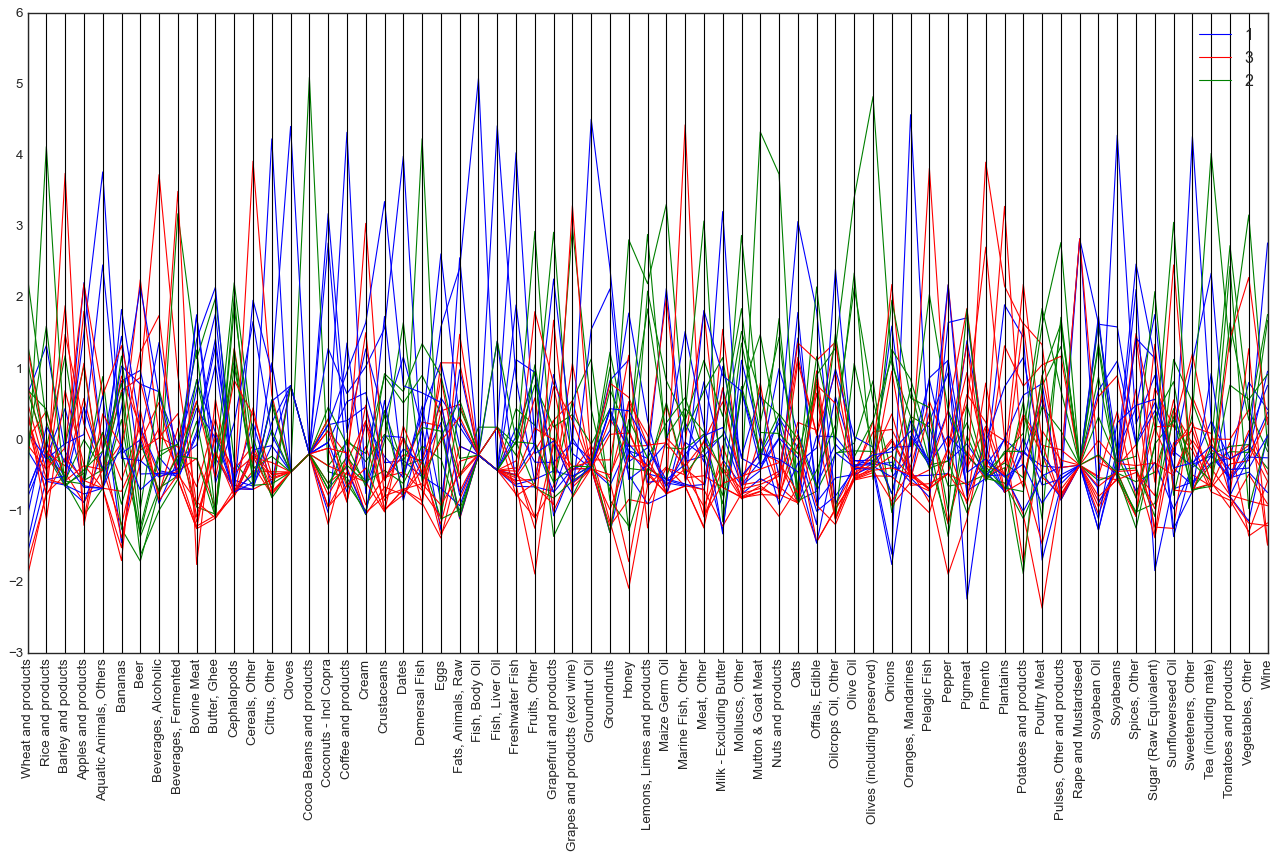

In [65]:
#Parallel coordinate plot of all variables colored by cluster labels
plt.figure(figsize=(20, 10))
plt.style.use('seaborn-white')
plt.xticks(rotation=90)
pd.plotting.parallel_coordinates(X_clustered, "Cluster",
                                     color=["blue", "red","green","orange"])
plt.grid(b=None)

In [66]:
#List of country names
country_list=list(df_countries)

In [67]:
#New df from food variable data
data=pd.read_csv('df1.csv')

In [68]:
df2014['Cluster']=clusterLabels

In [69]:
grouped_df = df2014.groupby('Cluster')

In [70]:
grouped_df = grouped_df[['Area','Cluster']]

In [71]:
#Listing countries in clusters with k 3
for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

            Area  Cluster
0        Austria        1
5        Belgium        1
30       Denmark        1
40       Finland        1
50       Germany        1
65       Ireland        1
85    Luxembourg        1
95   Netherlands        1
130       Sweden        1 


         Area  Cluster
20     Cyprus        2
45     France        2
55     Greece        2
70      Italy        2
90      Malta        2
105  Portugal        2
125     Spain        2 


          Area  Cluster
10    Bulgaria        3
15     Croatia        3
25     Czechia        3
35     Estonia        3
60     Hungary        3
75      Latvia        3
80   Lithuania        3
100     Poland        3
110    Romania        3
115   Slovakia        3
120   Slovenia        3 




In [72]:
grouped_df=grouped_df.apply(lambda x: x) 

In [73]:
data=data.merge(grouped_df,on='Area',how='left')

In [74]:
data.groupby('Cluster')['Area'].nunique()

Cluster
1     9
2     7
3    11
Name: Area, dtype: int64

In [75]:
data['Code'].unique()

array(['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN',
       'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX',
       'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE'],
      dtype=object)

In [76]:
data2014=data.loc[data['Year']==2014]

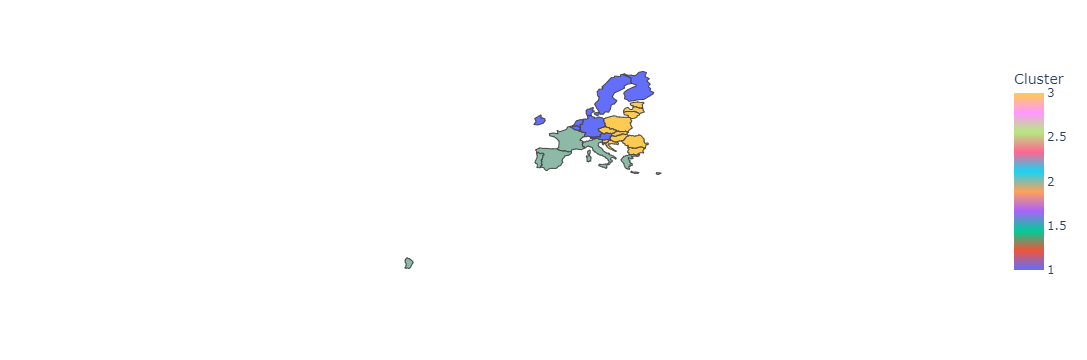

<Figure size 1600x1200 with 0 Axes>

In [77]:
#Choropleth map of the clusters
plt.figure(figsize=(20, 15))
fig = px.choropleth(data2014, locations="Code",
                    color="Cluster",
                    hover_name="Area",
                    color_continuous_scale=px.colors.qualitative.Plotly)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [78]:
#Grouping food products into food categories
data['Grain products']=data.loc[:,['Wheat and products',
 'Rice and products',
 'Barley and poducts',
 'Cereals, Other',
 'Oats'
]].sum(axis=1)

data['Vegetable and fruit products']=data.loc[:,[ 'Apples and products',
 'Bananas',
 'Citrus, Other',
 'Coconuts - Incl Copra',
 'Dates',
 'Cloves',
 'Fruits, Other',
 'Grapefruit and products',
 'Grapes and products (excl wine)',
 'Groundnuts',
 'Lemons, Limes and products',
 'Nuts and products',
 'Olives (including preserved)',
 'Onions',
 'Oranges, Mandarines',
 'Tomatoes and products',
 'Pimento',
 'Plantains',
 'Potatoes and products',
 'Pulses, Other and products',
 'Rape and Mustardseed',
 'Soyabeans',
 'Vegetables, Other'

]].sum(axis=1)

data['Seafood products']=data.loc[:,[  'Aquatic Animals, Others','Cephalopods',
 'Crustaceans',
 'Demersal Fish',
 'Fish, Body Oil',
 'Fish, Liver Oil',
 'Freshwater Fish',
 'Marine Fish, Other',
 'Molluscs, Other',
 'Pelagic Fish'

]].sum(axis=1)

data['Beverages incl. alcohol']=data.loc[:,[ 'Beer',
 'Beverages, Alcoholic',
 'Beverages, Fermented',
 'Wine'

]].sum(axis=1)

data['Meat products and eggs']=data.loc[:,[ 'Bovine Meat',
 'Fats, Animals, Raw',
 'Meat, Other',
 'Mutton & Goat Meat',
 'Offals, Edible',
 'Pigmeat',
 'Poultry Meat','Eggs'
]].sum(axis=1)


data['Oils and dairy products']=data.loc[:,[  'Sunflowerseed Oil',
 'Soyabean Oil',
 'Cocoa Beans and products',
 'Groundnut Oil',
 'Maize Germ Oil',
 'Milk - Excluding Butter',
 'Oilcrops Oil, Other',
 'Olive Oil',
 'Butter, Ghee',
 'Cream'
]].sum(axis=1)

data['Coffee and tea']=data.loc[:,[ 'Coffee and products',
 'Tea (including mate)'
]].sum(axis=1)


In [79]:
all_columns=['Wheat and products',
 'Rice and products',
 'Barley and poducts',
 'Cereals, Other',
 'Oats','Apples and products',
 'Bananas',
 'Citrus, Other',
 'Coconuts - Incl Copra',
 'Dates',
 'Cloves',
 'Fruits, Other',
 'Grapefruit and products',
 'Grapes and products (excl wine)',
 'Cephalopods',
 'Groundnuts',
 'Lemons, Limes and products',
 'Nuts and products',
 'Olives (including preserved)',
 'Onions',
 'Oranges, Mandarines',
 'Tomatoes and products',
 'Pimento',
 'Plantains',
 'Potatoes and products',
 'Pulses, Other and products',
 'Rape and Mustardseed',
 'Soyabeans',
 'Vegetables, Other','Aquatic Animals, Others',
 'Crustaceans',
 'Demersal Fish',
 'Fish, Body Oil',
 'Fish, Liver Oil',
 'Freshwater Fish',
 'Marine Fish, Other',
 'Molluscs, Other',
 'Pelagic Fish',
 'Beer',
 'Beverages, Alcoholic',
 'Beverages, Fermented',
 'Wine','Bovine Meat',
 'Fats, Animals, Raw',
 'Meat, Other',
 'Mutton & Goat Meat',
 'Offals, Edible',
 'Pigmeat',
 'Poultry Meat','Eggs',
  'Sunflowerseed Oil',
 'Soyabean Oil',
 'Cocoa Beans and products',
 'Groundnut Oil',
 'Maize Germ Oil',
 'Milk - Excluding Butter',
 'Oilcrops Oil, Other',
 'Olive Oil',
 'Butter, Ghee',
 'Cream','Coffee and products',
 'Tea (including mate)']

In [80]:
df_c_rearranged=df_c[all_columns]

In [81]:
#Calculating means per cluster
data.groupby("Cluster").mean()

Area Code (FAO)  Element Code  Item Code    Year  Wheat and products  \
Cluster                                                                         
1             131.777778         645.0     2511.0  2016.0           90.012889   
2             117.000000         645.0     2511.0  2016.0          118.391714   
3             131.818182         645.0     2511.0  2016.0           98.490909   

         Rice and products  Barley and poducts  Apples and products  \
Cluster                                                               
1                 5.354000            1.601111            14.085333   
2                 9.083143            1.913429            11.729143   
3                 3.500000            5.064909            14.881091   

         Aquatic Animals, Others  Aquatic Plants    Bananas       Beer  \
Cluster                                                                  
1                       0.032000             0.0  11.375333  82.691111   
2                       0.018571             0.0  10.464286  41.798286   
3                       0.021455             0.0   8.358909  89.445818   

         Beverages, Alcoholic  Beverages, Fermented  Bovine Meat  \
Cluster                                                            
1                    4.809333              0.367111    18.889111   
2                    3.742286              1.593143    15.330286   
3                    7.024545              1.580182     6.820909   

         Butter, Ghee  Cephalopods  Cereals, Other  Citrus, Other    Cloves  \
Cluster                                                                       
1            4.485333     0.239111        1.413333       0.762000  0.006444   
2            2.224571     2.603714        0.668000       0.344857  0.001429   
3            2.469455     0.453818        1.583455       0.182182  0.000909   

         Cocoa Beans and products  Coconuts - Incl Copra  Coffee and products  \
Cluster                                                                         
1                        0.016222               0.242000             8.704667   
2                        0.004000               0.144571             4.210000   
3                        0.000000               0.128364             3.227636   

            Cream  Crustaceans     Dates  Demersal Fish       Eggs  \
Cluster                                                              
1        7.334889     3.084444  0.226222       6.271778  13.159556   
2        1.920571     2.626286  0.187429      11.376571  10.990857   
3        5.438727     0.715455  0.111818       2.980909  11.150182   

         Fats, Animals, Raw  Fish, Body Oil  Fish, Liver Oil  Freshwater Fish  \
Cluster                                                                         
1                  3.117778        0.334222         0.007333         6.429778   
2                  1.632571        0.045714         0.008857         3.789429   
3                  2.448182        0.000545         0.001455         2.067273   

         Fruits, Other  Grapefruit and products  ...  Nuts and products  \
Cluster                                          ...                      
1            20.630444                 1.016667  ...           2.343556   
2            28.194857                 1.015429  ...           5.502000   
3            18.028182                 1.015091  ...           1.329091   

             Oats  Offals, Edible  Oilcrops Oil, Other  Olive Oil  \
Cluster                                                             
1        2.306000        2.275778             2.026000   1.102222   
2        0.705714        3.284000             2.033429   6.711143   
3        1.496182        2.768364             1.410364   0.432727   

         Olives (including preserved)     Onions  Oranges, Mandarines  \
Cluster                                                                 
1                            0.829778   6.662000            20.896222   
2                            4.2305

In [82]:
#Column list of food categories
columns=['Cluster', 'Year', 'Grain products',
       'Vegetable and fruit products', 'Seafood products',
       'Beverages incl. alcohol', 'Meat products and eggs',
       'Oils and dairy products', 'Coffee and tea']

In [83]:
data1=data[columns]

In [84]:
#Making new df with average values
df2014=data1[data1['Year']==2014]
df2014=df2014.groupby('Cluster').mean()
df2014=df2014.drop(columns='Year')
df2014.reset_index(inplace=True)
df2014=pd.read_csv('data2014.csv')

In [85]:
df2014=pd.read_csv('data2014.csv')

In [86]:
df2014.head()

Cluster       Value                          Type
0        0   98.739000       Wheat and rice products
1        1  117.125000       Wheat and rice products
2        2  129.048571       Wheat and rice products
3        0  229.323000  Vegetable and fruit products
4        1  244.029000  Vegetable and fruit products

In [87]:
#Column names
cols=["Vegetable and fruit products","Seafood products","Beverages incl. alcohol","Meat products incl. eggs","Oils and milk products","Coffee and tea"]

In [88]:
#sns.set_theme(style="whitegrid")
#ax = sns.scatterplot(y="Type", x='Value', hue='Cluster', data=df2014, color=colors)

In [89]:
data1=data[data['Year']==2014]

In [90]:
data1=data1[['Area', 'Code', 'Cluster','Grain products','Vegetable and fruit products', 'Seafood products','Beverages incl. alcohol', 'Meat products and eggs', 'Oils and dairy products', 'Coffee and tea']]

In [91]:
#Dataset with only variable values for correlation analysis
data2=data1.drop(columns='Cluster')

In [92]:
data2.reset_index(drop=True,inplace=True)

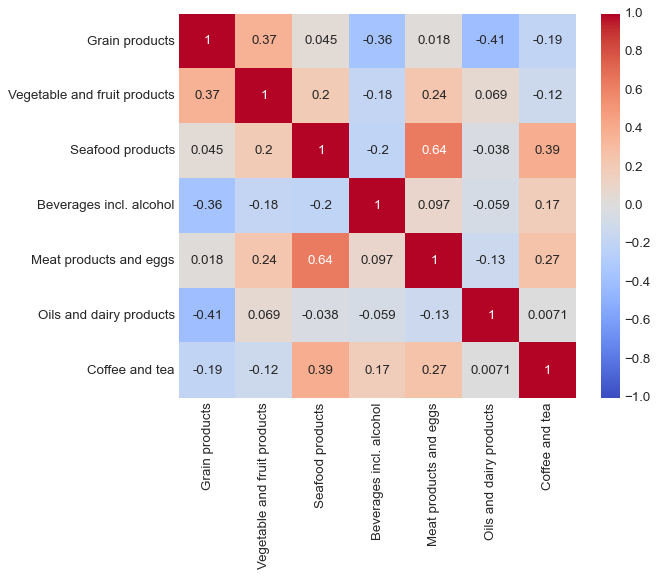

In [93]:
#Heatmap of the correlation matrix
corrMatrix = data2.corr()
sns.heatmap(corrMatrix,vmin=-1, vmax=1, annot=True,cmap="coolwarm")
plt.show()

In [94]:
#New df with values to visualize
df_all=pd.read_csv('dataAllCountries1.csv')

In [95]:
df3 = pd.read_csv('df2.csv')

<AxesSubplot:xlabel='Value', ylabel='Type'>

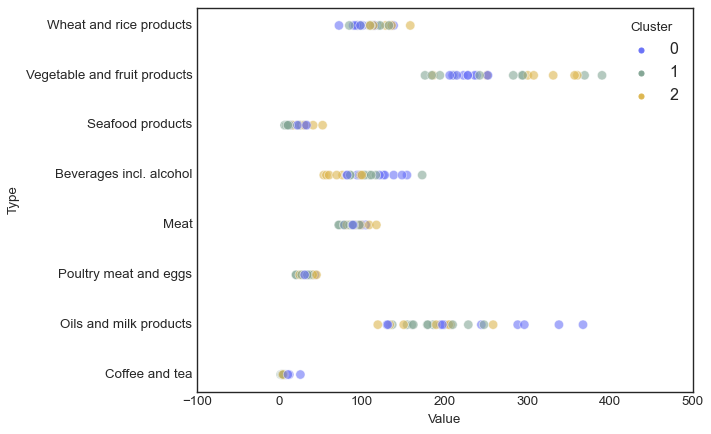

In [96]:
#Mean consumption per food group for countries colored by cluster numbers
plt.style.use('seaborn-white')
sns.scatterplot(y='Type',x='Value',hue='Cluster',data=df_all,palette=colors,s=70,alpha=0.6)

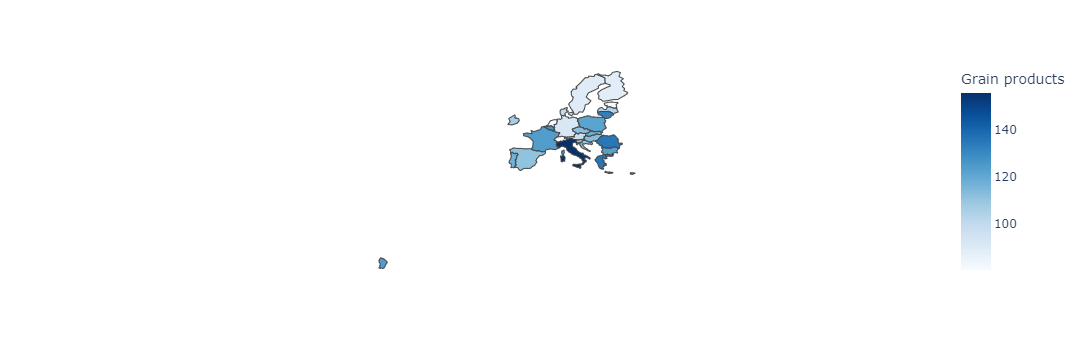

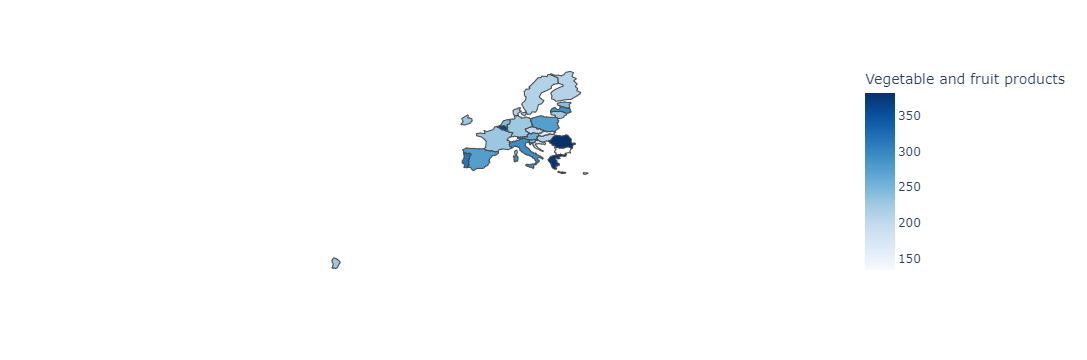

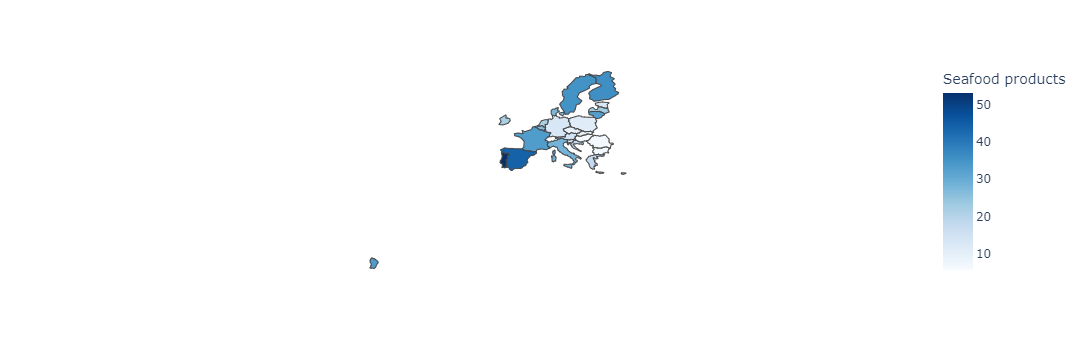

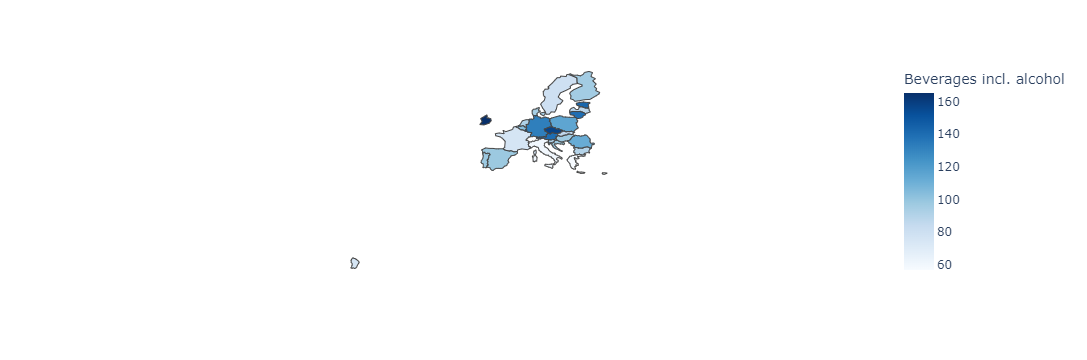

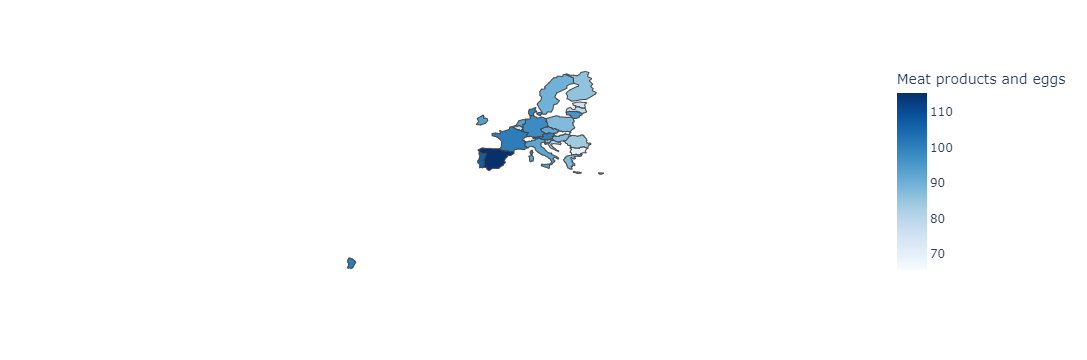

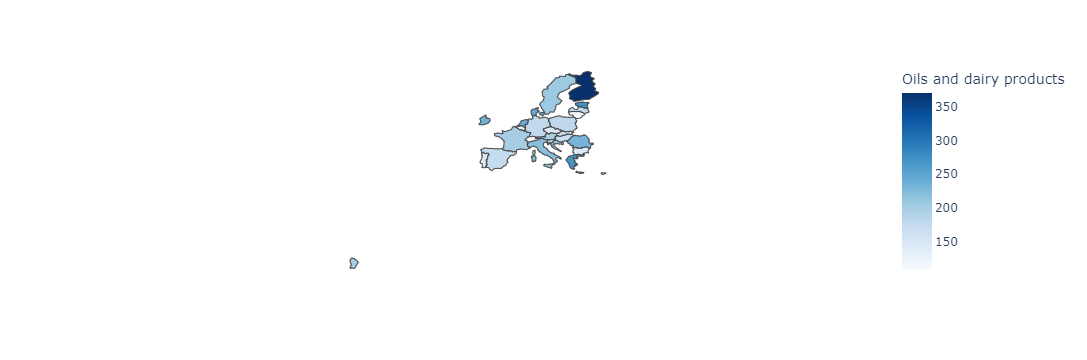

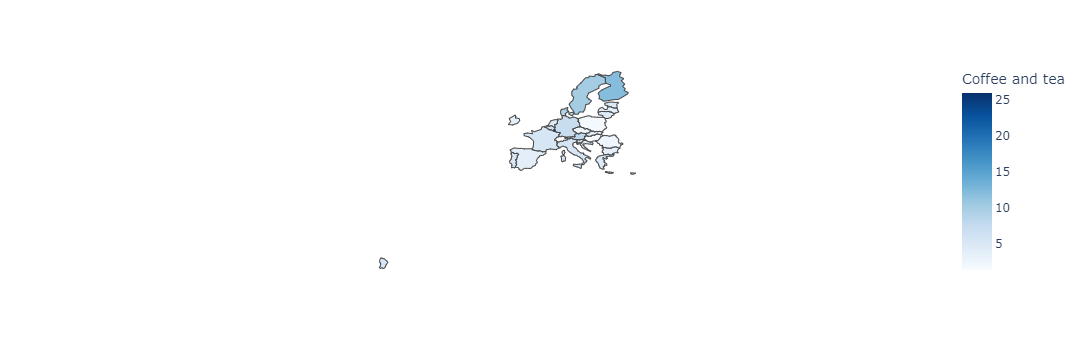

In [97]:
#Choropleth maps for food consumption in individual countries
fig = px.choropleth(data2, locations="Code",
                    color="Grain products",
                    hover_name="Area",
                    color_continuous_scale=px.colors.sequential.Blues)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

fig = px.choropleth(data2, locations="Code",
                    color="Vegetable and fruit products",
                    hover_name="Area",
                    color_continuous_scale=px.colors.sequential.Blues)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

fig = px.choropleth(data2, locations="Code",
                    color="Seafood products",
                    hover_name="Area",
                    color_continuous_scale=px.colors.sequential.Blues)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

fig = px.choropleth(data2, locations="Code",
                    color="Beverages incl. alcohol",
                    hover_name="Area",
                    color_continuous_scale=px.colors.sequential.Blues)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

fig = px.choropleth(data2, locations="Code",
                    color="Meat products and eggs",
                    hover_name="Area",
                    color_continuous_scale=px.colors.sequential.Blues)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

fig = px.choropleth(data2, locations="Code",
                    color="Oils and dairy products",
                    hover_name="Area",
                    color_continuous_scale=px.colors.sequential.Blues)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

fig = px.choropleth(data2, locations="Code",
                    color="Coffee and tea",
                    hover_name="Area",
                    color_continuous_scale=px.colors.sequential.Blues)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

<h3>Emission data analysis</h3>

In [98]:
#Lists of countries in clusters
Cluster_0=['Bulgaria',
'Croatia',
'Cyprus',
'Czechia',
'Estonia',
'Hungary',
'Lithuania',
'Poland',
'Romania',
'Slovakia',
'Slovenia']

Cluster_1=['Belgium',
'France',
'Greece',
'Italy',
'Malta',
'Portugal',
'Spain',]

Cluster_2=['Austria',
'Denmark',
'Finland',
'Germany',
'Ireland',
'Latvia',
'Luxembourg',
'Netherlands',
'Sweden']

In [99]:
data2_2=data2.drop(columns=['Code','Area'])
data2_2['Cluster']=clusterLabels

data2_c0=data2.drop(columns='Code')
data2_c0=data2_c0[data2_c0['Area'].isin(Cluster_0)]

data2_c1=data2.drop(columns='Code')
data2_c1=data2_c1[data2_c1['Area'].isin(Cluster_1)]

data2_c2=data2.drop(columns='Code')
data2_c2=data2_c2[data2_c2['Area'].isin(Cluster_2)]

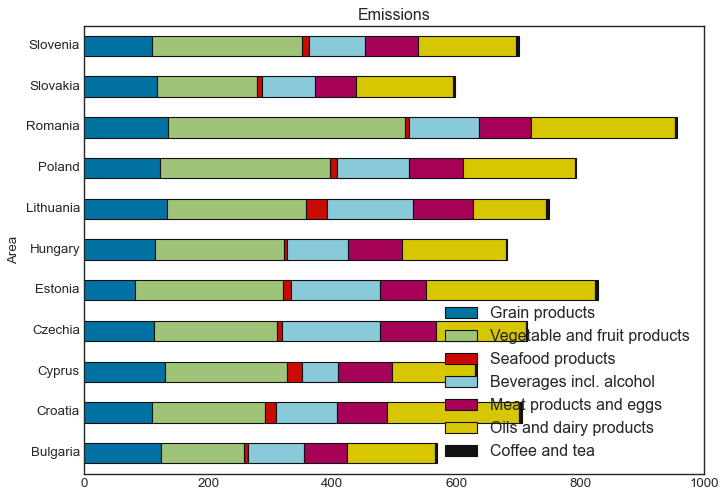

In [100]:
#Emission data plotted
plt.style.use('seaborn-white')
data2_c0.plot(
    x = 'Area',
    kind = 'barh',
    stacked = True,
    title = 'Emissions',
    mark_right = True,
    figsize=(10,7),
sort_columns=True);

In [101]:
data2_2.reset_index(drop=True,inplace=True)

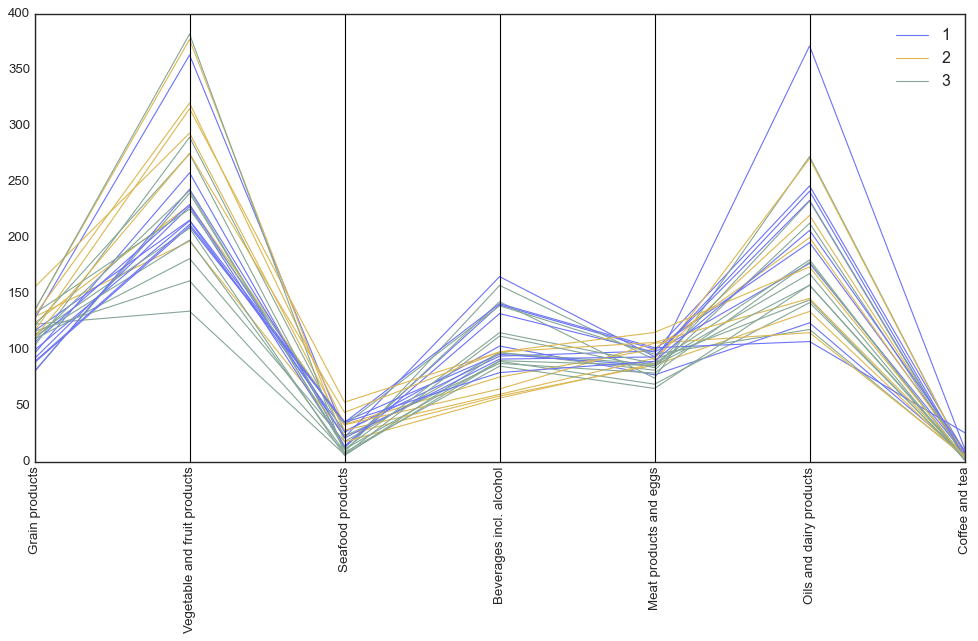

In [102]:
#Food consumption for food groups
plt.figure(figsize=(15, 7))
plt.style.use('seaborn-white')
plt.xticks(rotation=90)
pd.plotting.parallel_coordinates(data2_2, "Cluster",
                                     color=colors)
plt.grid(b=None)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

In [103]:
#Mean values
data2_2.groupby('Cluster').agg('mean')

Grain products  Vegetable and fruit products  Seafood products  \
Cluster                                                                   
1             99.822222                    241.712222         25.551111   
2            129.048571                    286.812857         33.367143   
3            114.294545                    230.743636         13.143636   

         Beverages incl. alcohol  Meat products and eggs  \
Cluster                                                    
1                     116.003333               93.331111   
2                      73.261429               99.315714   
3                     110.506364               82.096364   

         Oils and dairy products  Coffee and tea  
Cluster                                           
1                     211.520000        9.592222  
2                     180.051429        4.688571  
3                     178.653636        3.367273

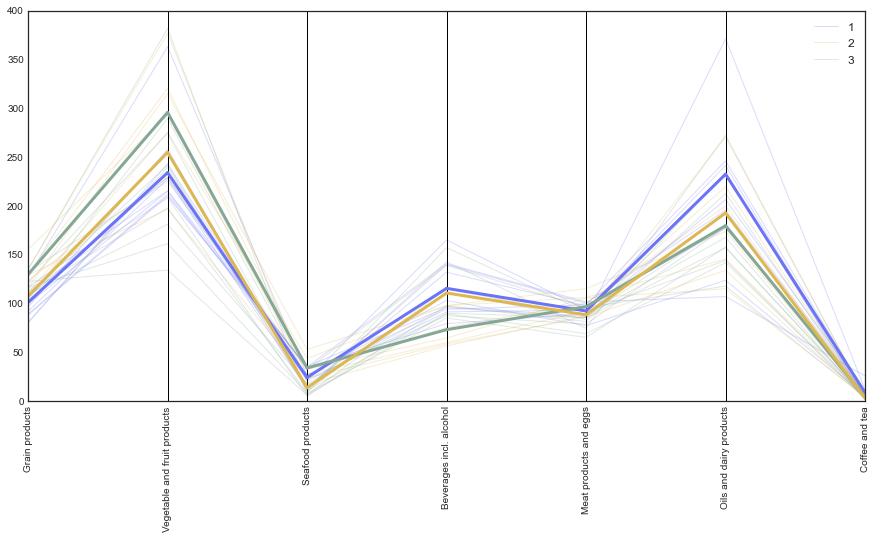

In [208]:
#Food groups in parallel coordinate plot with average values per cluster plotted
plt.figure(figsize=(15, 7))
plt.style.use('seaborn-white')
plt.xticks(rotation=90)
pd.plotting.parallel_coordinates(data2_2, "Cluster",
                                     color=colors,alpha=0.25)
plt.plot([0,1], [101.4,234.3], lw=3,c='#6b73f7')
plt.plot([1,2], [234.3,24.5], 'k-', lw=3,c="#6b73f7")
plt.plot([2,3], [24.5,115.8], 'k-', lw=3,c='#6b73f7')
plt.plot([3,4], [115.8,92.6], 'k-', lw=3,c='#6b73f7')
plt.plot([4,5], [92.6,232.7], 'k-', lw=3,c='#6b73f7')
plt.plot([5,6], [232.7,9], 'k-', lw=3,c='#6b73f7')

plt.plot([0,1], [130,296], lw=3,c='#85a796')
plt.plot([1,2], [296,34.2], 'k-', lw=3,c='#85a796')
plt.plot([2,3], [34.2,73.5], 'k-', lw=3,c='#85a796')
plt.plot([3,4], [73.5,97], 'k-', lw=3,c='#85a796')
plt.plot([4,5], [97,180], 'k-', lw=3,c='#85a796')
plt.plot([5,6], [180,4.6], 'k-', lw=3,c='#85a796')

plt.plot([0,1], [107.8,255], lw=3,c='#ddb751')
plt.plot([1,2], [255,14], 'k-', lw=3,c='#ddb751')
plt.plot([2,3], [14,111], 'k-', lw=3,c='#ddb751')
plt.plot([3,4], [111,88.7], 'k-', lw=3,c='#ddb751')
plt.plot([4,5], [88.7,193], 'k-', lw=3,c='#ddb751')
plt.plot([5,6], [193,3.6], 'k-', lw=3,c='#ddb751')
plt.grid(b=None)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

<h2>Part2</h2>

In [105]:
df3 = pd.read_csv('df2.csv')

In [106]:
#Population data
pop=df3[['Population']]

In [107]:
#List of country codes
code_list=df3['Country_code']

In [108]:
#Emission data
df4=pd.read_csv('co2_emiss.csv')

In [109]:
df4.head()

Domain Code            Domain  Area Code (FAO)     Area  Element Code  \
0          EM  Emissions shares               11  Austria          7273   
1          EM  Emissions shares               11  Austria          7273   
2          EM  Emissions shares               11  Austria          7273   
3          EM  Emissions shares               11  Austria          7273   
4          EM  Emissions shares               11  Austria          7273   

           Element  Item Code                     Item  Year Code  Year  \
0  Emissions (CO2)       6996      Farm-gate emissions       2016  2016   
1  Emissions (CO2)       6516          Land Use change       2016  2016   
2  Emissions (CO2)       6510  On-farm electricity use       2016  2016   
3  Emissions (CO2)       6507          Food Processing       2016  2016   
4  Emissions (CO2)       6815           Food Transport       2016  2016   

         Unit      Value Flag Flag Description  
0  kilotonnes  1009.5096   Fc  Calculated data  
1  kilotonnes   225.9400   Fc  Calculated data  
2  kilotonnes   239.1235   Fc  Calculated data  
3  kilotonnes  1277.0602   Fc  Calculated data  
4  kilotonnes  1783.2060   Fc  Calculated data

In [110]:
df4=df4[['Area','Item','Year','Value']]

In [111]:
df4.describe()

Year         Value
count   243.0    243.000000
mean   2016.0   2235.098392
std       0.0   4268.640133
min    2016.0      0.000000
25%    2016.0    123.438600
50%    2016.0    589.448500
75%    2016.0   1815.866850
max    2016.0  26023.446000

<AxesSubplot:xlabel='Item'>

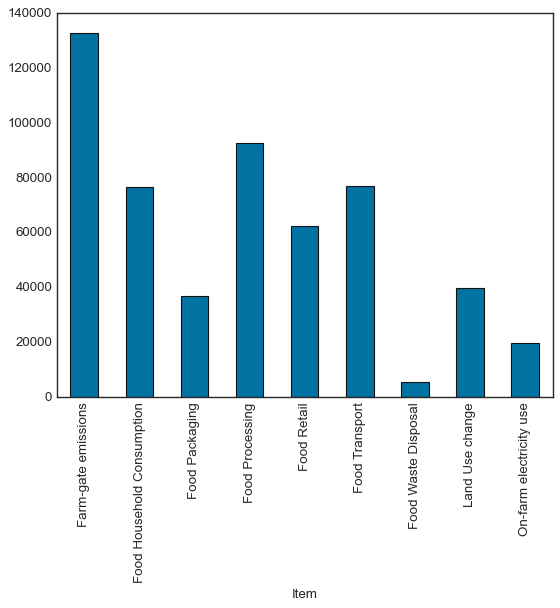

In [112]:
df4.groupby(['Item'])['Value'].sum().plot(kind = "bar")

In [113]:
#Df for only CO2 emissions for plotting
df5 = pd.read_csv('co2_emiss2.csv')

In [114]:
#df5.drop(columns=['Cluster','Cluster'],inplace=True)

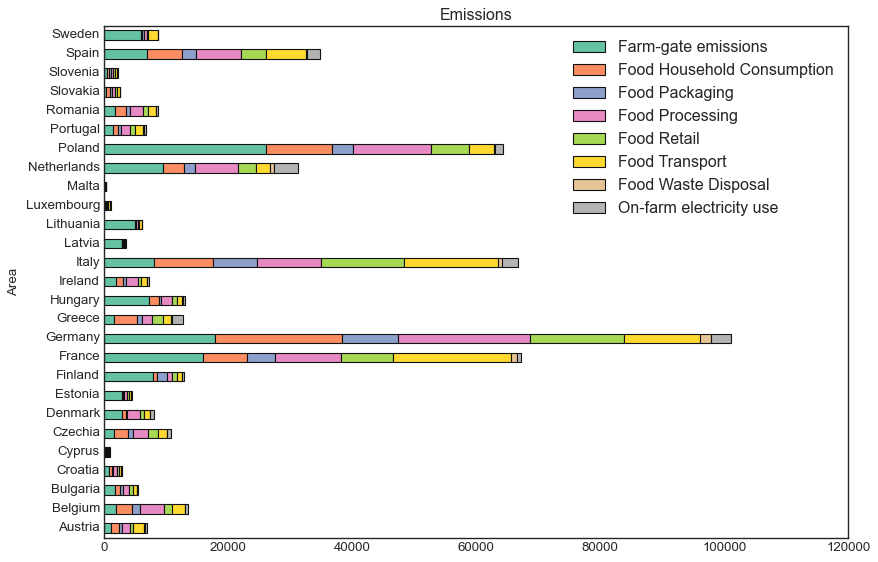

In [115]:
#All CO2 emissions plotted for the countries
plt.style.use('seaborn-white')
df5.plot(
    x = 'Area',
    kind = 'barh',
    stacked = True,
    title = 'Emissions',
    mark_right = True,
    figsize=(12,8),colormap='Set2');

In [116]:
#Df for only CO2 emissions for plotting
df_ch4=pd.read_csv('ch4_emiss2.csv')

In [117]:
a=df_ch4['Food Waste Disposal_CH4'].sum()

In [118]:
b=df_ch4.iloc[:,1:].to_numpy().sum()

In [119]:
#Calculating food waste disposal proportion of all emissions
a/b*100

81.14181710717378

<AxesSubplot:title={'center':'Emissions'}, ylabel='Area'>

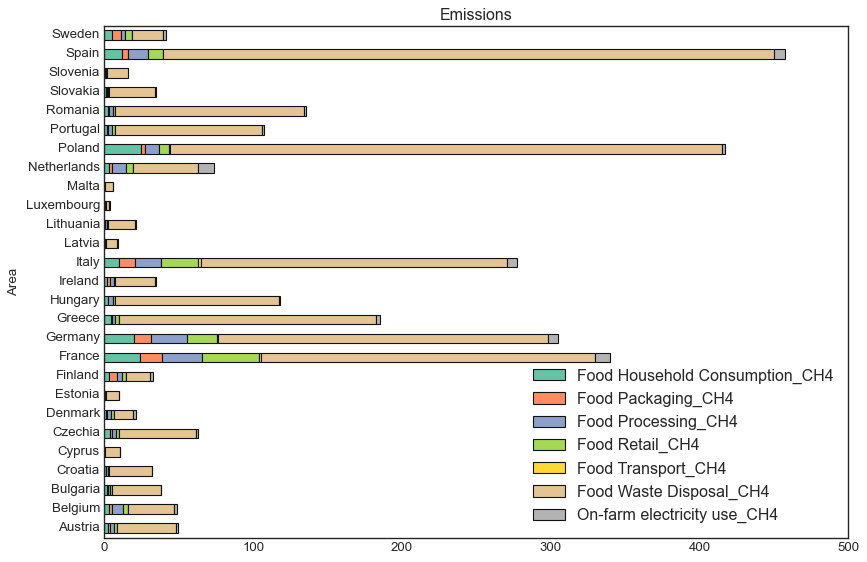

In [120]:
#All CH4 emissions plotted for the countries
plt.style.use('seaborn-white')
df_ch4.plot(
    x = 'Area',
    kind = 'barh',
    stacked = True,
    title = 'Emissions',
    mark_right = True,
    figsize=(12,8),colormap='Set2')

In [121]:
#CO2 emission columns
df5_c=df5[['Farm-gate emissions',
 'Food Household Consumption',
 'Food Packaging',
 'Food Processing',
 'Food Retail',
 'Food Transport',
 'Food Waste Disposal',
 'On-farm electricity use']]

In [122]:
#Methane emission columns
df_ch4_c=df_ch4[['Food Household Consumption_CH4', 'Food Packaging_CH4',
       'Food Processing_CH4', 'Food Retail_CH4', 'Food Transport_CH4',
       'Food Waste Disposal_CH4', 'On-farm electricity use_CH4']]

In [123]:
#All emissions concatted into one df with continuous variables
df5_c=pd.concat([df5_c,df_ch4_c], axis=1)

In [124]:
df5_c.head()

Farm-gate emissions  Food Household Consumption  Food Packaging  \
0            1009.5096                   1277.5917        555.8078   
1            1815.5447                   2643.6901       1283.3088   
2            1702.8497                    887.7023        443.5758   
3             690.1817                    512.7179        133.6286   
4              98.4062                    186.0019          5.8876   

   Food Processing  Food Retail  Food Transport  Food Waste Disposal  \
0        1277.0602     498.5905       1783.2060             185.1764   
1        3845.3373    1397.2003       1981.8627             115.8268   
2         958.9739     604.0712        672.7125               6.8999   
3         673.9995     281.1872        468.7175              65.2838   
4         178.5114     182.4395        147.0700               3.6993   

   On-farm electricity use  Food Household Consumption_CH4  \
0                 239.1235                          2.6657   
1                 403.3902                          3.1991   
2                 120.8550                          2.0284   
3                  20.7913                          1.0463   
4                 130.3874                          0.2322   

   Food Packaging_CH4  Food Processing_CH4  Food Retail_CH4  \
0              1.1112               2.5984           2.0840   
1              2.1659               7.2565           2.9486   
2              0.4995               1.5298           1.2413   
3              0.2174               0.9596           0.7489   
4              0.0024               0.2057           0.2729   

   Food Transport_CH4  Food Waste Disposal_CH4  On-farm electricity use_CH4  
0              0.0718                  39.6558                       1.4208  
1              0.0776                  31.1055                       1.9944  
2              0.1405                  32.6104                       0.2676  
3              0.0380                  28.9800                       0.0744  
4              0.0112                   9.5579                       0.2064

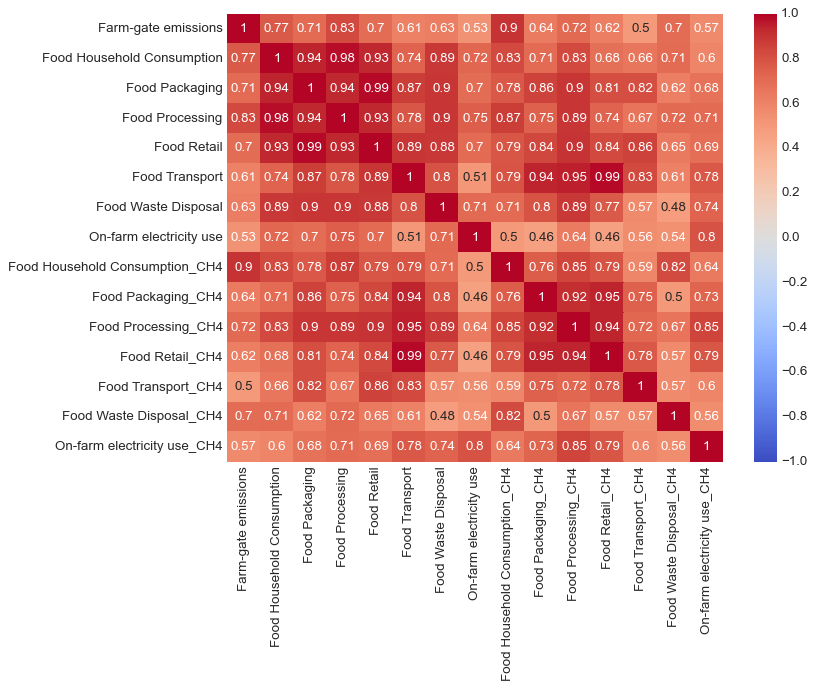

In [125]:
#Correlation matrix of emission rates
corrMatrix = df5_c.corr()
plt.figure(figsize=(10, 7), dpi=80)
sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True,cmap="coolwarm")
plt.show()

In [126]:
#Emissions df scaled
scaler = StandardScaler()
df5_scaled= scaler.fit_transform(df5_c)
df5_scaled = pd.DataFrame(df5_scaled)
df5_scaled.columns = df5_c.columns

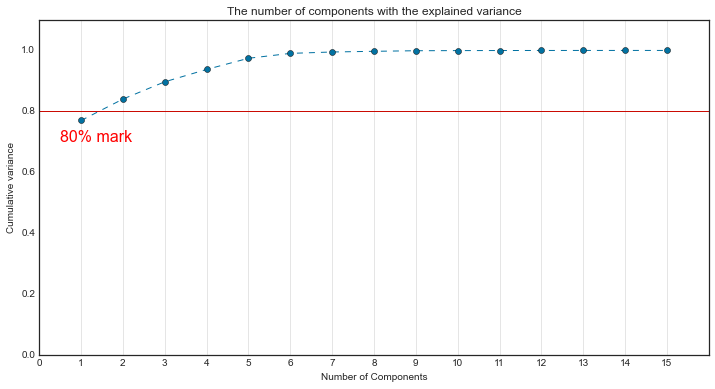

In [127]:
#PCA analysis of the scaled emissions df, before dividing the values by population data
pca = PCA().fit(df5_scaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 16, step=1))
plt.ylabel('Cumulative variance')
plt.title('The number of components with the explained variance')

plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.7, '80% mark', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [128]:
#PCA with 2 components
pca = PCA(n_components=2)

pca.fit(df5_scaled)

projectedAxes = pca.transform(df5_scaled)
projectedAxes=pd.DataFrame(projectedAxes)

In [129]:
#Explained variance with 2 components
np.cumsum(pca.explained_variance_ratio_)

array([0.76980324, 0.84016857])

In [130]:
#Adding cluster labels and population data
projectedAxes['Cluster']=clusterLabels
projectedAxes['Pop']=pop

In [131]:
projectedAxes.head()

0         1  Cluster         Pop
0 -1.393347 -0.272843        1   8795073.0
1 -0.641143 -0.255185        1  11349081.0
2 -1.823744 -0.155867        3   7075946.5
3 -2.130043 -0.176828        3   4124531.0
4 -2.394376 -0.222835        2    859520.0

In [132]:
projectedAxes['Country']=country_list

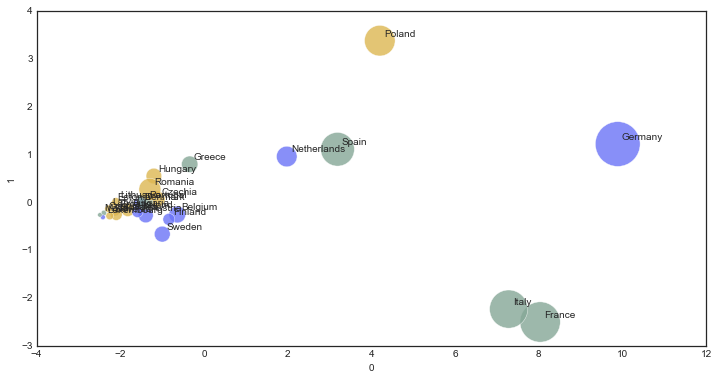

In [133]:
#Visualizing the countries over the first 2 pc:s of the emission data; large countries stand out
sns.scatterplot(data=projectedAxes, x=projectedAxes[0], y=projectedAxes[1],
                size="Pop", hue='Cluster',legend=False, sizes=(20, 2000),palette=colors,alpha=0.8)
for i in range(projectedAxes.shape[0]):
    plt.text(x=projectedAxes[0][i]+0.1,y=projectedAxes[1][i]+0.1,s=projectedAxes.Country[i])

In [134]:
df5['Cluster']=clusterLabels

In [135]:
df5=df5.sort_values(by=['Cluster'])

In [136]:
df7=pd.read_csv('ch4_data.csv')

In [137]:
df_c=df_c.reset_index(drop=True)

In [138]:
data3=data2.reset_index(drop=True)

In [139]:
data3=data3.iloc[:,2:]

In [140]:
df_concat=pd.concat([data3,df5_c],axis=1)

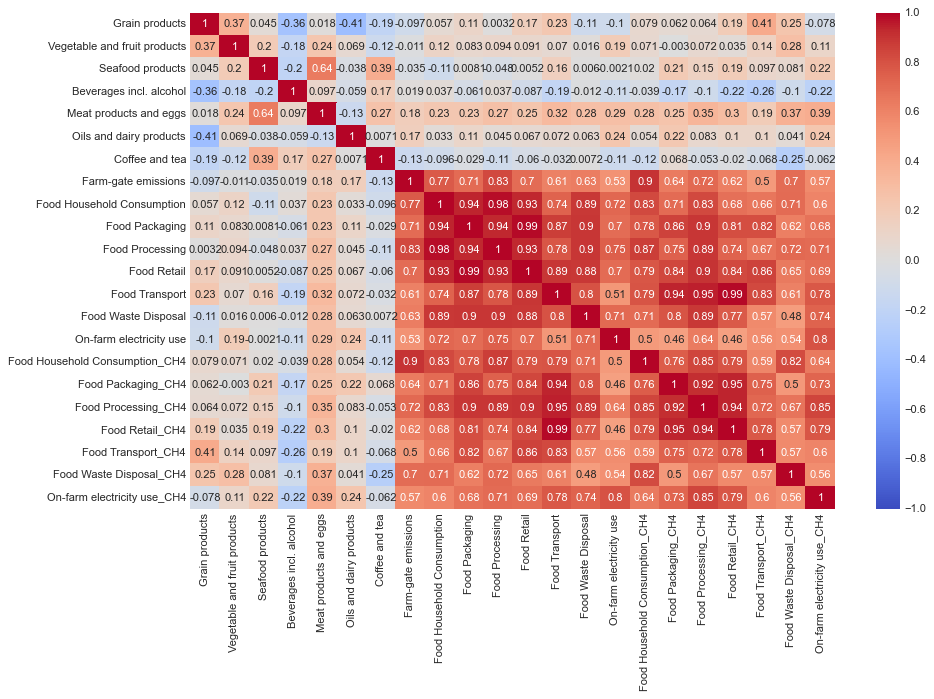

In [205]:
#Correlation matrix for 
plt.style.use('seaborn-white')
corrMatrix = df_concat.corr()
plt.figure(figsize=(13, 8), dpi=80)
sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True,cmap="coolwarm")
plt.show()

<h3>True emission rates (divided by population)</h3>

In [142]:
#Importing the dataset with true emission rates per person
df_rates=pd.read_csv('emiss_CHI.csv')

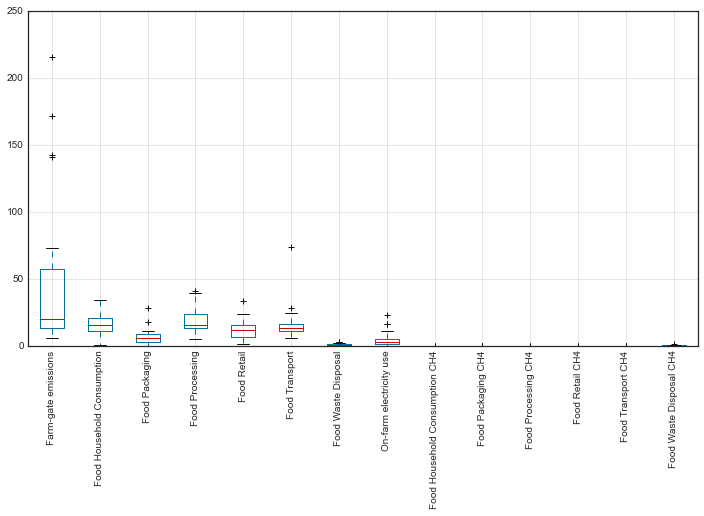

In [143]:
#Boxplot of the emission rates to detect data distribution and outliers
df_rates.boxplot()
plt.style.use('seaborn-white')
plt.xticks(rotation=90);

In [144]:
#Choosing only numeric values
df_rates=df_rates.iloc[:,1:]

In [145]:
#Scaling the data
scaler = StandardScaler()
CHI_scaled= scaler.fit_transform(df_rates)
CHI_scaled = pd.DataFrame(CHI_scaled)
CHI_scaled.columns = CHI_scaled.columns

In [146]:
CHI_scaled.head()

0         1         2         3         4         5         6   \
0 -0.640793 -0.154912 -0.148645 -0.480115 -0.975259  0.295383  0.999290   
1 -0.559831  0.925623  0.722380  1.424652 -0.049569  0.057307 -0.103276   
2 -0.417240 -0.424110 -0.172971 -0.594816 -0.588409 -0.599066 -1.033039   
3 -0.550558 -0.445388 -0.703292 -0.329356 -0.831418 -0.453098  0.441049   
4 -0.697797  0.002900 -1.176768 -0.417239  0.406087 -0.343905 -0.812672   

         7         8         9         10        11        12        13  
0 -0.421403  0.192762 -0.164649 -0.083042 -0.300650 -0.418584 -0.460481  
1 -0.276251  0.014812  0.152904  2.265508 -0.128744 -0.637641 -0.998566  
2 -0.605106  0.032407 -0.448228 -0.649951 -0.811196  1.419092 -0.449659  
3 -0.816325 -0.232429 -0.537593 -0.545481 -0.769514 -0.277083  0.260406  
4  1.061209 -0.640085 -0.786008 -0.915913 -0.342872 -0.202273  0.627967

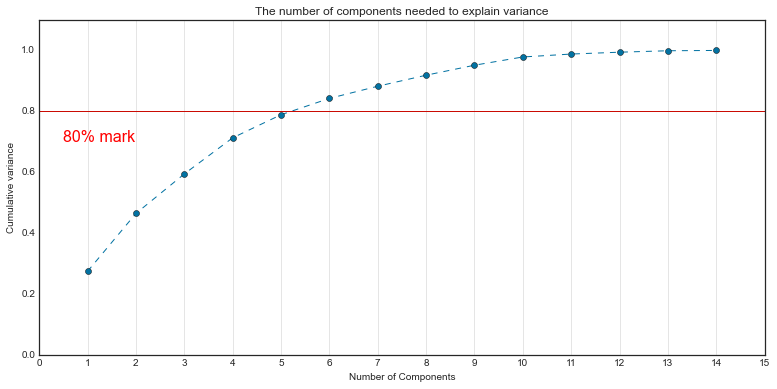

In [147]:
#PCA for the emission rates per person
pca = PCA().fit(CHI_scaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,6)

fig, ax = plt.subplots()
xi = np.arange(1, 15, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 16, step=1))
plt.ylabel('Cumulative variance')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.7, '80% mark', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#shape (27, 68)

In [148]:
#Explained variance for principle components
np.cumsum(pca.explained_variance_ratio_)

array([0.27420627, 0.46428939, 0.59417012, 0.71283585, 0.78871924,
       0.84233967, 0.88235209, 0.9185963 , 0.95142034, 0.97850681,
       0.98812829, 0.99423008, 0.99894433, 1.        ])

In [149]:
CHI_scaled.shape

(27, 14)

In [150]:
#Number of components chosen = 6
pca=PCA(n_components=6)

In [151]:
pca.fit(CHI_scaled)
scores_pca=pca.transform(CHI_scaled)

In [152]:
idx_list=list(range(0,27))
col_list= ['1','2','3','4','5','6']

In [153]:
scores_pca_df=pd.DataFrame(scores_pca,columns=col_list,index=idx_list)

In [154]:
#Adding cluster labels, country names and population data
scores_pca_df['Cluster']=clusterLabels
scores_pca_df['Country']=country_list
scores_pca_df['Pop']=pop

In [155]:
scores_pca_df.head()

1         2         3         4         5         6  Cluster  \
0 -0.441282  0.419928  0.284768 -0.433460 -0.838166 -0.773704        1   
1  1.674928  0.199410 -1.145900  0.682736 -2.140372  0.269017        1   
2 -1.450836  0.584930  0.694184  0.123589  0.016813  1.708627        3   
3 -1.704938  0.017460  0.073055 -0.257600 -0.434873 -0.327567        3   
4 -1.570353 -1.328087  0.089749  0.060712  0.138092  0.126889        2   

    Country         Pop  
0   Austria   8795073.0  
1   Belgium  11349081.0  
2  Bulgaria   7075946.5  
3   Croatia   4124531.0  
4    Cyprus    859520.0

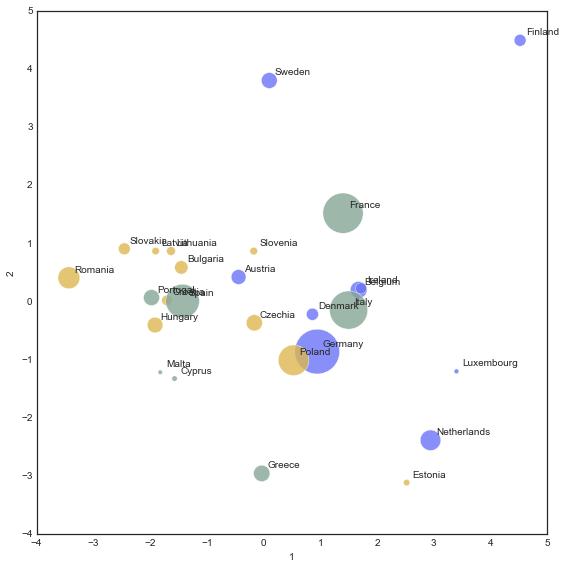

In [156]:
#Visualization of the countries over 2 first principle components colored based on their initial clusters
from adjustText import adjust_text
plt.figure(figsize=(8,8))
sns.scatterplot(data=scores_pca_df, x='1', y='2',size='Pop', sizes=(20, 2000),hue='Cluster',legend=False,palette=colors,alpha=0.8)

for i in range(scores_pca_df.shape[0]):
    plt.text(x=scores_pca_df['1'][i]+0.1,y=scores_pca_df['2'][i]+0.1,s=scores_pca_df.Country[i])
    
plt.tight_layout()

In [157]:
#projectedAxes['Cluster']=clusterLabels
#projectedAxes['Pop']=pop
#projectedAxes['Country']=country_list

In [158]:
#projectedAxes.head()

In [159]:
#Creating new df for mean emission values
df_rates_mean=df_rates.copy()

In [160]:
df_rates.columns

Index(['Farm-gate emissions', 'Food Household Consumption', 'Food Packaging',
       'Food Processing', 'Food Retail', 'Food Transport',
       'Food Waste Disposal', 'On-farm electricity use',
       'Food Household Consumption CH4', 'Food Packaging CH4',
       'Food Processing CH4', 'Food Retail CH4', 'Food Transport CH4',
       'Food Waste Disposal CH4'],
      dtype='object')

In [161]:
df_rates_mean['Country']=country_list
df_rates_mean['Cluster']=clusterLabels

In [162]:
#Average CO2 values for countries
df_rates_mean['Mean_CO2'] = df_rates_mean[['Farm-gate emissions', 'Food Household Consumption', 'Food Packaging',
       'Food Processing', 'Food Retail', 'Food Transport',
       'Food Waste Disposal', 'On-farm electricity use']].mean(axis=1)

In [163]:
#Average CH4 values for countries
df_rates_mean['Mean_CH4'] = df_rates_mean[['Food Household Consumption CH4', 'Food Packaging CH4',
       'Food Processing CH4', 'Food Retail CH4', 'Food Transport CH4',
       'Food Waste Disposal CH4']].mean(axis=1)

In [164]:
df_rates_mean.head()

Farm-gate emissions  Food Household Consumption  Food Packaging  \
0            11.554858                   14.623329        6.361782   
1            16.022214                   23.330612       11.325223   
2            23.890183                   12.454047        6.223160   
3            16.533876                   12.282583        3.201184   
4             8.409428                   15.895031        0.503132   

   Food Processing  Food Retail  Food Transport  Food Waste Disposal  \
0        14.617245     5.706872       20.410596             2.119531   
1        33.935170    12.330317       17.489973             1.022174   
2        13.453954     8.474836        9.437841             0.096802   
3        16.146218     6.736073       11.228517             1.563928   
4        15.254920    15.590601       12.568055             0.316128   

   On-farm electricity use  Food Household Consumption CH4  \
0                 2.737010                        0.030512   
1                 3.559926                        0.028232   
2                 1.695539                        0.028458   
3                 0.498073                        0.025065   
4                11.142422                        0.019843   

   Food Packaging CH4  Food Processing CH4  Food Retail CH4  \
0            0.012719             0.029741         0.023853   
1            0.019114             0.064039         0.026021   
2            0.007008             0.021462         0.017415   
3            0.005208             0.022988         0.017941   
4            0.000205             0.017578         0.023321   

   Food Transport CH4  Food Waste Disposal CH4   Country  Cluster   Mean_CO2  \
0            0.000822                 0.453901   Austria        1   9.766403   
1            0.000685                 0.274507   Belgium        1  14.876951   
2            0.001971                 0.457509  Bulgaria        3   9.465795   
3            0.000910                 0.694240   Croatia        3   8.523807   
4            0.000957                 0.816783    Cyprus        2   9.959965   

   Mean_CH4  
0  0.091925  
1  0.068766  
2  0.088970  
3  0.127725  
4  0.146448

In [165]:
df_rates_mean=df_rates_mean[['Country','Cluster','Mean_CO2','Mean_CH4']]

In [166]:
df_rates_mean.head(3)

Country  Cluster   Mean_CO2  Mean_CH4
0   Austria        1   9.766403  0.091925
1   Belgium        1  14.876951  0.068766
2  Bulgaria        3   9.465795  0.088970

In [167]:
df_rates_mean["Mean_CO2"].mean()

15.650350008462965

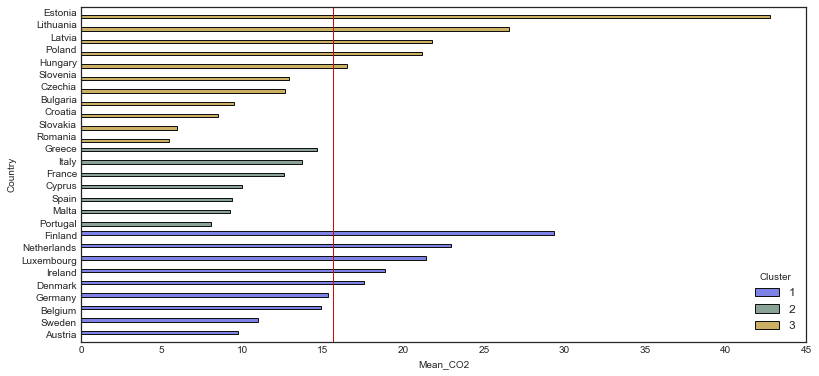

In [168]:
#Visualization of average CO2 emissions per countries, colored by clusters, red line indicating the average
sns.barplot(data=df_rates_mean,y='Country',x='Mean_CO2',hue='Cluster',palette=colors,
            order=df_rates_mean.sort_values(['Cluster','Mean_CO2'],ascending=False).Country)

plt.rcParams["figure.figsize"] = (10,7)
plt.axvline(15.65, 0,20,linestyle='-',color='r')

In [169]:
df_rates_mean["Mean_CH4"].mean()

0.11853035186419753

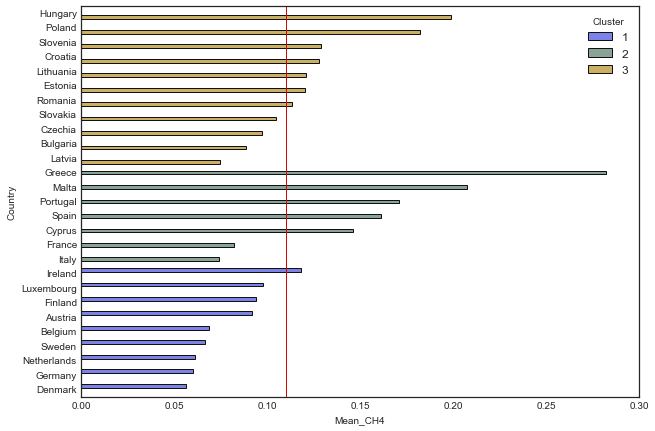

In [170]:
#Visualization of average CH4 emissions per countries, colored by clusters, red line indicating the average
sns.barplot(data=df_rates_mean,y='Country',x='Mean_CH4',hue='Cluster',palette=colors,
            order=df_rates_mean.sort_values(['Cluster','Mean_CH4'],ascending=False).Country)

plt.rcParams["figure.figsize"] = (10,7)
plt.axvline(0.11, 0,20,linestyle='-',color='r')

In [171]:
df_meatproducts=df_c[['Bovine Meat',
 'Fats, Animals, Raw',
 'Meat, Other',
 'Mutton & Goat Meat',
 'Offals, Edible',
 'Pigmeat',
 'Poultry Meat','Eggs']]

In [172]:
df_meat_emiss=pd.concat([df_meatproducts,df5_c],axis=1)

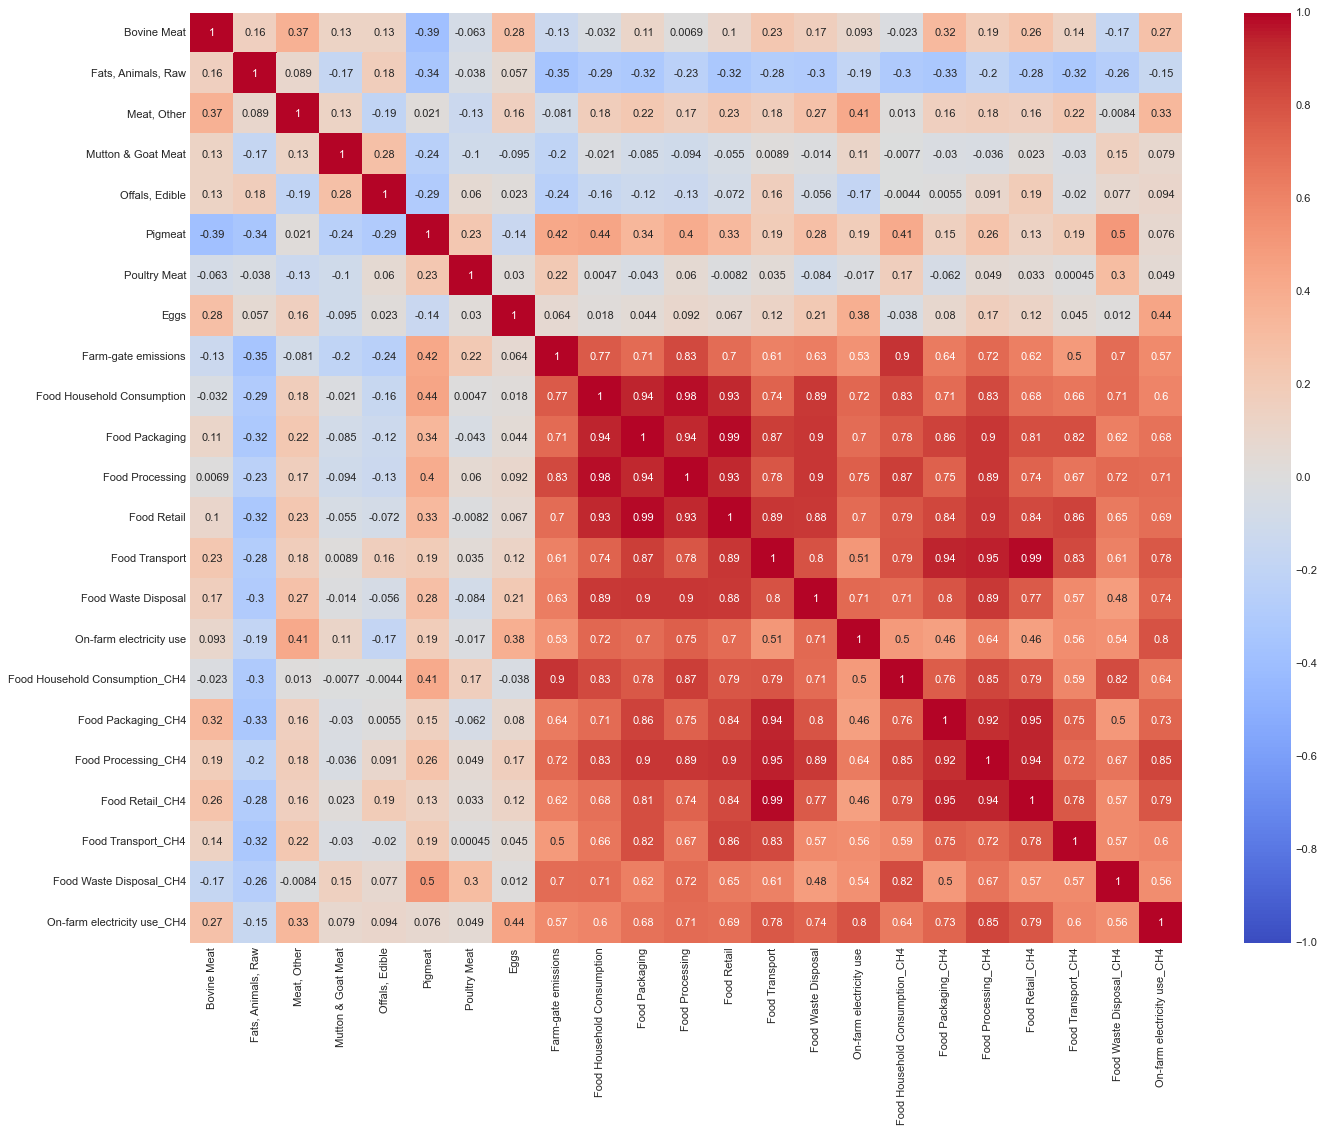

In [173]:
#Correlation matrix of the individual meat type consumption data with emission data
corrMatrix = df_meat_emiss.corr()
plt.figure(figsize=(20, 15), dpi=80)
sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True,cmap="coolwarm")
plt.show()

In [174]:
pigmeat=df_meatproducts[['Pigmeat']]

In [175]:
pigmeat_emiss=pd.concat([pigmeat,df_rates_mean],axis=1)

In [176]:
#New data sets with pig meat data and emissions data
foodwaste_pigmeat=df_rates[['Food Waste Disposal CH4']]
farmgate_pigmeat=df_rates[['Farm-gate emissions']]

In [178]:
foodwaste_pigmeat=pd.DataFrame(foodwaste_pigmeat)
pigmeat=pd.DataFrame(pigmeat)

In [179]:
farmgate_pigmeat=pd.DataFrame(farmgate_pigmeat)
pigmeat=pd.DataFrame(pigmeat)

In [180]:
type(foodwaste_pigmeat)

pandas.core.frame.DataFrame

In [181]:
foodwaste_pigmeat=pd.merge(foodwaste_pigmeat, pigmeat, left_index=True, right_index=True)

In [182]:
farmgate_pigmeat=pd.merge(farmgate_pigmeat, pigmeat, left_index=True, right_index=True)

In [183]:
#Scaling the pig meat & emissions data
scaler = StandardScaler()
foodwaste_pigmeat= scaler.fit_transform(foodwaste_pigmeat)
foodwaste_pigmeat = pd.DataFrame(foodwaste_pigmeat)
foodwaste_pigmeat.columns = ['Food Waste Disposal CH4','Pigmeat']

farmgate_pigmeat= scaler.fit_transform(farmgate_pigmeat)
farmgate_pigmeat = pd.DataFrame(farmgate_pigmeat)
farmgate_pigmeat.columns = ['Farm-gate emissions','Pigmeat']

In [186]:
#Linear regression model
X = foodwaste_pigmeat['Pigmeat'].values.reshape(-1, 1) # values converts it into a numpy array
Y = foodwaste_pigmeat['Food Waste Disposal CH4'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)
foodwaste_pigmeat["Distance"] = Y - Y_pred

In [187]:
col_one_list = foodwaste_pigmeat["Distance"].tolist()

In [188]:
from scipy.stats import linregress
linregress(foodwaste_pigmeat['Pigmeat'], foodwaste_pigmeat['Food Waste Disposal CH4'])

LinregressResult(slope=0.19078052563138972, intercept=-6.888948483735861e-17, rvalue=0.19078052563138972, pvalue=0.3404832420336473, stderr=0.1963265433954167, intercept_stderr=0.19632654339541664)

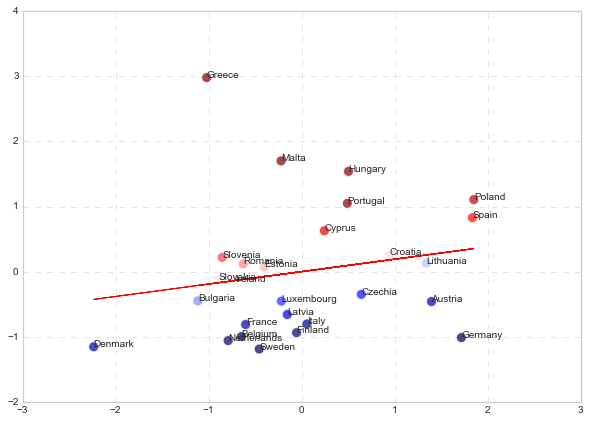

In [189]:
#Visualizing the linear regression, with prediction line in red
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.scatter(foodwaste_pigmeat['Pigmeat'], foodwaste_pigmeat['Food Waste Disposal CH4'],vmin = -1., vmax = 1.,
            s=100,c=foodwaste_pigmeat['Distance'], cmap=plt.cm.seismic,alpha=0.7)
plt.plot(X, Y_pred, color='red')
for i, label in enumerate(country_list):
    plt.annotate(label, (X[i], Y[i]))
plt.show()

In [190]:
X = farmgate_pigmeat['Pigmeat'].values.reshape(-1, 1) # values converts it into a numpy array
Y = farmgate_pigmeat['Farm-gate emissions'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)
farmgate_pigmeat["Distance"] = Y - Y_pred

In [191]:
col_one_list = farmgate_pigmeat["Distance"].tolist()

In [192]:
linregress(farmgate_pigmeat['Pigmeat'], farmgate_pigmeat['Farm-gate emissions'])

LinregressResult(slope=0.05739700336252331, intercept=1.8433163469878128e-16, rvalue=0.0573970033625233, pvalue=0.776130332746026, stderr=0.19967028662322323, intercept_stderr=0.19967028662322317)

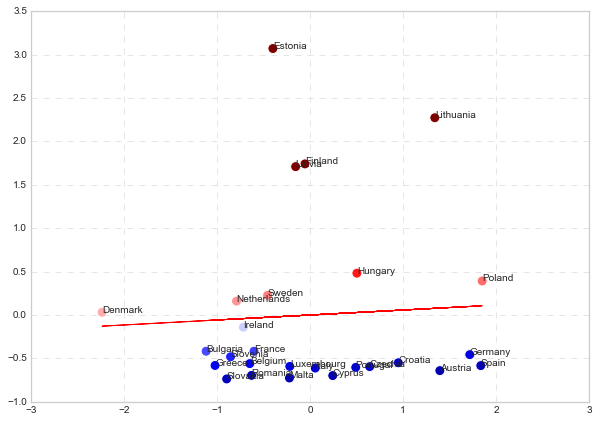

In [193]:
#Visualizing the linear regression, with prediction line in red
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.scatter(farmgate_pigmeat['Pigmeat'], farmgate_pigmeat['Farm-gate emissions'],vmin = -1., vmax = 1.,
            s=100,c=farmgate_pigmeat['Distance'], cmap=plt.cm.seismic)
plt.plot(X, Y_pred,color='red')
for i, label in enumerate(country_list):
    plt.annotate(label, (X[i], Y[i]))
plt.show()

In [194]:
df_rates['Cluster']=clusterLabels

In [195]:
#Data set on emissions per types
df_co2type=pd.read_csv('emiss_CHI_co2pertype.csv')

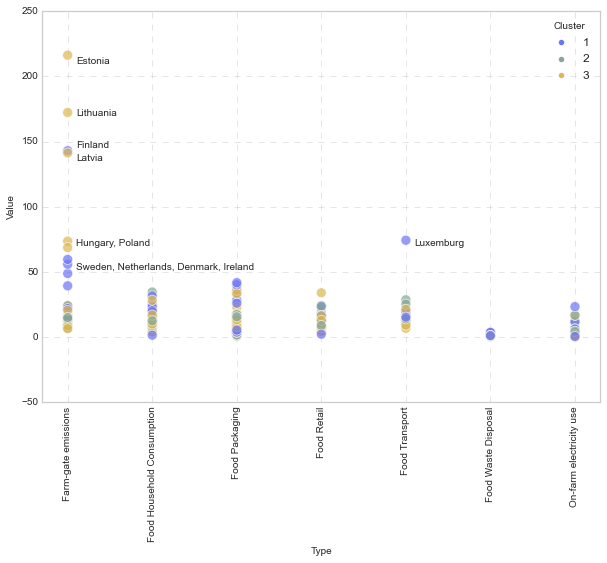

In [196]:
#Visualizing the CO2 emission rates, colored by clusters
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.scatterplot(data=df_co2type,x='Type',y='Value',hue='Cluster',palette=colors,s=100,alpha=0.7)
plt.annotate("Estonia", (0.1, 210))
plt.annotate("Lithuania", (0.1, 170))
plt.annotate("Finland", (0.1, 145))
plt.annotate("Latvia", (0.1, 135))
plt.annotate("Hungary, Poland", (0.1, 70))
plt.annotate("Luxemburg", (4.1, 70))
plt.annotate("Sweden, Netherlands, Denmark, Ireland", (0.1, 52))
plt.xticks(rotation=90);

In [197]:
df_ch4type=pd.read_csv('emiss_CHI_ch4pertype.csv')

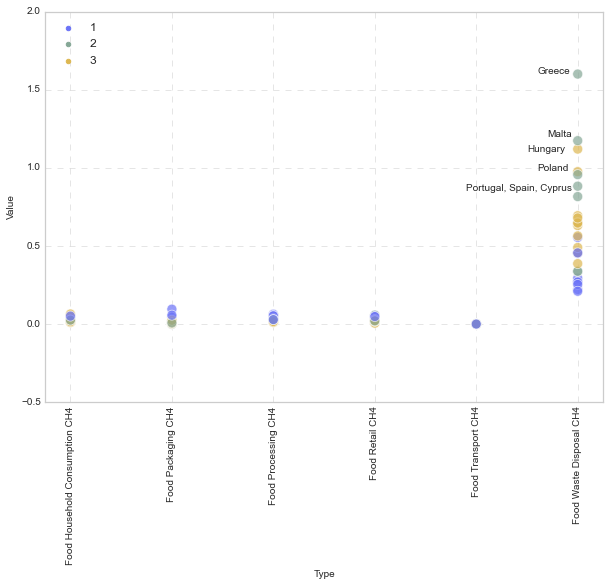

In [198]:
#Visualizing the CH4 emission rates, colored by clusters
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.scatterplot(data=df_ch4type,x='Type',y='Value',hue='Cluster',palette=colors,s=100,alpha=0.7)
plt.legend(loc='upper left')
plt.annotate("Greece", (4.6, 1.6))
plt.annotate("Malta", (4.7, 1.2))
plt.annotate("Hungary", (4.5, 1.1))
plt.annotate("Poland", (4.6, 0.98))
plt.annotate("Portugal, Spain, Cyprus", (3.9, 0.85))
plt.xticks(rotation=90);